## Setup Drive and Data Folder 46 Shuffle true

In [1]:

#! pip3 install auto-sklearn

In [2]:
import os
os.chdir('..')

In [3]:
import pandas as pd
import os
import numpy as np
RNDSEED = np.random.seed(39)
PRECISION = 4 # 3 of digits to keep after the decimal point
from sklearn import tree
from sklearn import metrics
from sklearn.metrics import f1_score, cohen_kappa_score

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_regression
from sklearn.metrics import r2_score, mean_squared_error
RUNNING_ON_COLAB = False # we assume running on CoLab! Change to False if running locally.

*italicized text*

In [4]:
## mount gdrive
#from google.colab import drive#
#drive.mount("/content/gdrive")

In [5]:
# If running locally, define current working path
path = os.getcwd()

# If Google colab
if RUNNING_ON_COLAB:
    path = "/content/gdrive/My Drive/Colab Notebooks/RandomForest_FeatureData"

print(path)

# define current data path. This is after we did classification. We have done some
# cleaning already.
data_path = path + '/fl_testbed/version2/data/initial'
print(data_path)
#/home/jose/FL_AM_Defect-Detection
#/home/jose/FL_AM_Defect-Detection/fl_testbed/version2/data/initial

/home/jose/FL_AM_Defect-Detection
/home/jose/FL_AM_Defect-Detection/fl_testbed/version2/data/initial


## Play code

<font color=cyan>The key is to transform the time column! </font>


In [6]:
!cd '/home/jose/FL_AM_Defect-Detection/notebooks/fl_testbed/version2/data/initial' && ls

/bin/bash: line 0: cd: /home/jose/FL_AM_Defect-Detection/notebooks/fl_testbed/version2/data/initial: No such file or directory


In [7]:
## start - play code
print(data_path)
csv_file = data_path + '/combined_offset_misalignment.csv'
df_temp = pd.read_csv(csv_file, chunksize=50000) 
df = pd.concat(df_temp, ignore_index=True)

/home/jose/FL_AM_Defect-Detection/fl_testbed/version2/data/initial


In [8]:
print(df.columns)

Index(['Unnamed: 0', 'wf_start_time', 'Probe_1_AxialDirection_CrestFactor_g~g',
       'Probe_1_AxialDirection_DerivedPeak_g',
       'Probe_1_AxialDirection_Peak~Peak_g', 'Probe_1_AxialDirection_RMS_g',
       'Probe_1_AxialDirection_TruePeak_g',
       'Probe_1_AxialDirection_HighFrequency_grms',
       'Probe_1_AxialDirection_Kurtosis_g~g',
       'Probe_2_RadialVertical_CrestFactor_g~g',
       'Probe_2_RadialVertical_DerivedPeak_g',
       'Probe_2_RadialVertical_Peak~Peak_g', 'Probe_2_RadialVertical_RMS_g',
       'Probe_2_RadialVertical_TruePeak_g',
       'Probe_2_RadialVertical_HighFrequency_grms',
       'Probe_2_RadialVertical_Kurtosis_g~g',
       'Probe_3_RadialHorizontal_CrestFactor_g~g',
       'Probe_3_RadialHorizontal_DerivedPeak_g',
       'Probe_3_RadialHorizontal_Peak~Peak_g',
       'Probe_3_RadialHorizontal_RMS_g', 'Probe_3_RadialHorizontal_TruePeak_g',
       'Probe_3_RadialHorizontal_HighFrequency_grms',
       'Probe_3_RadialHorizontal_Kurtosis_g~g',
       'Pr

In [9]:
df.head(5)

,Unnamed: 0,wf_start_time,Probe_1_AxialDirection_CrestFactor_g~g,Probe_1_AxialDirection_DerivedPeak_g,Probe_1_AxialDirection_Peak~Peak_g,Probe_1_AxialDirection_RMS_g,Probe_1_AxialDirection_TruePeak_g,Probe_1_AxialDirection_HighFrequency_grms,Probe_1_AxialDirection_Kurtosis_g~g,Probe_2_RadialVertical_CrestFactor_g~g,...,Probe_6_BearingRadial_RMS_g,Probe_6_BearingRadial_TruePeak_g,Probe_6_BearingRadial_HighFrequency_grms,Probe_6_BearingRadial_Kurtosis_g~g,Thermocouple 1_Value,Thermocouple 2_Value,Thermocouple 3_Value,Thermocouple 4_Value,status,rul
0,0,2022-08-30 19:17:41.000007,2.9679,0.1485,0.6232,0.1050,0.3116,0.0303,2.3544,3.0998,...,0.0166,0.0687,0.0074,3.1289,72.5799,72.4725,72.5867,73.0246,6.25mm_Offset,176049.0
1,1,2022-08-30 19:17:42.000007,3.0104,0.1511,0.6261,0.1069,0.3217,0.0310,2.3787,3.0161,...,0.0162,0.0618,0.0076,2.9855,72.5552,72.4137,72.5893,73.0349,6.25mm_Offset,176048.0
2,2,2022-08-30 19:17:43.000007,3.2165,0.1611,0.6889,0.1139,0.3664,0.0309,2.3040,3.2447,...,0.0160,0.0595,0.0074,3.2605,72.5661,72.4391,72.5610,73.0723,6.25mm_Offset,176047.0
3,3,2022-08-30 19:17:44.000007,3.1404,0.1388,0.6156,0.0981,0.3081,0.0309,2.4416,3.1142,...,0.0163,0.0867,0.0075,3.7580,72.5788,72.4654,72.5600,73.0508,6.25mm_Offset,176046.0
4,4,2022-08-30 19:17:45.000007,3.4300,0.1520,0.6706,0.1075,0.3686,0.0302,2.3783,3.1580,...,0.0160,0.0680,0.0074,3.1019,72.5864,72.4441,72.5711,73.0678,6.25mm_Offset,176045.0


In [10]:
# drop Unnamed columns
df = df[df.columns.drop(list(df.filter(regex='Unnamed')))]


In [11]:
# Let's find the youngest & oldest timestamp

df['wf_start_time'] = pd.to_datetime(df['wf_start_time']) # make sure it is datetime

youngest = min(df.wf_start_time)
oldest = max(df.wf_start_time)
print(youngest)
print(oldest)
span = oldest - youngest
print(span)
print(span.total_seconds())

## Using Oldest - current to determine the RUL
df['rul'] = df['wf_start_time'].apply(lambda x: (oldest - x).total_seconds())

2022-08-09 14:03:22.000007
2022-09-01 20:11:50.000007
23 days 06:08:28
2009308.0


In [12]:
df.head(5)

,wf_start_time,Probe_1_AxialDirection_CrestFactor_g~g,Probe_1_AxialDirection_DerivedPeak_g,Probe_1_AxialDirection_Peak~Peak_g,Probe_1_AxialDirection_RMS_g,Probe_1_AxialDirection_TruePeak_g,Probe_1_AxialDirection_HighFrequency_grms,Probe_1_AxialDirection_Kurtosis_g~g,Probe_2_RadialVertical_CrestFactor_g~g,Probe_2_RadialVertical_DerivedPeak_g,...,Probe_6_BearingRadial_RMS_g,Probe_6_BearingRadial_TruePeak_g,Probe_6_BearingRadial_HighFrequency_grms,Probe_6_BearingRadial_Kurtosis_g~g,Thermocouple 1_Value,Thermocouple 2_Value,Thermocouple 3_Value,Thermocouple 4_Value,status,rul
0,2022-08-30 19:17:41.000007,2.9679,0.1485,0.6232,0.1050,0.3116,0.0303,2.3544,3.0998,0.4020,...,0.0166,0.0687,0.0074,3.1289,72.5799,72.4725,72.5867,73.0246,6.25mm_Offset,176049.0
1,2022-08-30 19:17:42.000007,3.0104,0.1511,0.6261,0.1069,0.3217,0.0310,2.3787,3.0161,0.4009,...,0.0162,0.0618,0.0076,2.9855,72.5552,72.4137,72.5893,73.0349,6.25mm_Offset,176048.0
2,2022-08-30 19:17:43.000007,3.2165,0.1611,0.6889,0.1139,0.3664,0.0309,2.3040,3.2447,0.4001,...,0.0160,0.0595,0.0074,3.2605,72.5661,72.4391,72.5610,73.0723,6.25mm_Offset,176047.0
3,2022-08-30 19:17:44.000007,3.1404,0.1388,0.6156,0.0981,0.3081,0.0309,2.4416,3.1142,0.4004,...,0.0163,0.0867,0.0075,3.7580,72.5788,72.4654,72.5600,73.0508,6.25mm_Offset,176046.0
4,2022-08-30 19:17:45.000007,3.4300,0.1520,0.6706,0.1075,0.3686,0.0302,2.3783,3.1580,0.4001,...,0.0160,0.0680,0.0074,3.1019,72.5864,72.4441,72.5711,73.0678,6.25mm_Offset,176045.0


In [13]:
df.columns

Index(['wf_start_time', 'Probe_1_AxialDirection_CrestFactor_g~g',
       'Probe_1_AxialDirection_DerivedPeak_g',
       'Probe_1_AxialDirection_Peak~Peak_g', 'Probe_1_AxialDirection_RMS_g',
       'Probe_1_AxialDirection_TruePeak_g',
       'Probe_1_AxialDirection_HighFrequency_grms',
       'Probe_1_AxialDirection_Kurtosis_g~g',
       'Probe_2_RadialVertical_CrestFactor_g~g',
       'Probe_2_RadialVertical_DerivedPeak_g',
       'Probe_2_RadialVertical_Peak~Peak_g', 'Probe_2_RadialVertical_RMS_g',
       'Probe_2_RadialVertical_TruePeak_g',
       'Probe_2_RadialVertical_HighFrequency_grms',
       'Probe_2_RadialVertical_Kurtosis_g~g',
       'Probe_3_RadialHorizontal_CrestFactor_g~g',
       'Probe_3_RadialHorizontal_DerivedPeak_g',
       'Probe_3_RadialHorizontal_Peak~Peak_g',
       'Probe_3_RadialHorizontal_RMS_g', 'Probe_3_RadialHorizontal_TruePeak_g',
       'Probe_3_RadialHorizontal_HighFrequency_grms',
       'Probe_3_RadialHorizontal_Kurtosis_g~g',
       'Probe_4_RadialVe

In [ ]:
# save back
df.to_csv(csv_file)

## saved more than 50% space!

In [14]:
csv_file

'/home/jose/FL_AM_Defect-Detection/fl_testbed/version2/data/initial/combined_offset_misalignment.csv'

In [15]:
os.path.basename(os.path.dirname(csv_file))

'initial'

In [16]:
## end - play code

## Util - add RUL column

In [17]:
csv_file = data_path + '/combined_offset_misalignment.csv'
df_temp = pd.read_csv(csv_file, chunksize=50000) 
df = pd.concat(df_temp, ignore_index=True)

In [18]:
# Let's find the youngest & oldest timestamp

df['wf_start_time'] = pd.to_datetime(df['wf_start_time']) # make sure it is datetime

youngest = min(df.wf_start_time)
oldest = max(df.wf_start_time)
print(youngest)
print(oldest)
span = oldest - youngest
print(span)
print(span.total_seconds())

## Using Oldest - current to determine the RUL
df['rul'] = df['wf_start_time'].apply(lambda x: (oldest - x).total_seconds())

2022-08-09 14:03:22.000007
2022-09-01 20:11:50.000007
23 days 06:08:28
2009308.0


In [19]:
# save back with RUL
df.to_csv(data_path + '/combined_offset_misalignment_with_RUL.csv')


## RF Regression

In [20]:
## Common imports
import pandas as pd
import numpy as np
import csv
import os

from sklearn import tree
from sklearn import metrics
from sklearn.metrics import f1_score, cohen_kappa_score

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_regression
from sklearn.metrics import r2_score, mean_squared_error
# from pandas_ml import ConfusionMatrix

import matplotlib
import matplotlib.pyplot as plt
plt.style.available
%matplotlib inline

# to make this notebook's output stable across runs
RNDSEED = np.random.seed(39)

### Exploring the data a bit & prep the df

In [21]:
## future, let's read the file
csv_file = data_path + '/combined_offset_misalignment_with_RUL.csv'
df_temp = pd.read_csv(csv_file, chunksize=50000) 
big_df = pd.concat(df_temp)

In [22]:
df = big_df # reset 

# drop unwanted cols
df = df[df.columns.drop(list(df.filter(regex='Unnamed')))] # drop Unnamed
df = df[df.columns.drop(list(df.filter(regex='wf_start_time')))] # drop time column
df = df[df.columns.drop(list(df.filter(regex='status')))] # drop status column



In [23]:
df.shape

(238722, 47)

In [24]:
df.columns

Index(['Probe_1_AxialDirection_CrestFactor_g~g',
       'Probe_1_AxialDirection_DerivedPeak_g',
       'Probe_1_AxialDirection_Peak~Peak_g', 'Probe_1_AxialDirection_RMS_g',
       'Probe_1_AxialDirection_TruePeak_g',
       'Probe_1_AxialDirection_HighFrequency_grms',
       'Probe_1_AxialDirection_Kurtosis_g~g',
       'Probe_2_RadialVertical_CrestFactor_g~g',
       'Probe_2_RadialVertical_DerivedPeak_g',
       'Probe_2_RadialVertical_Peak~Peak_g', 'Probe_2_RadialVertical_RMS_g',
       'Probe_2_RadialVertical_TruePeak_g',
       'Probe_2_RadialVertical_HighFrequency_grms',
       'Probe_2_RadialVertical_Kurtosis_g~g',
       'Probe_3_RadialHorizontal_CrestFactor_g~g',
       'Probe_3_RadialHorizontal_DerivedPeak_g',
       'Probe_3_RadialHorizontal_Peak~Peak_g',
       'Probe_3_RadialHorizontal_RMS_g', 'Probe_3_RadialHorizontal_TruePeak_g',
       'Probe_3_RadialHorizontal_HighFrequency_grms',
       'Probe_3_RadialHorizontal_Kurtosis_g~g',
       'Probe_4_RadialVertical_CrestFacto

### RF works

In [25]:
# Get X & y
# Naming convention: X as predictors; y as response.
from sklearn.model_selection import train_test_split

y = df['rul'] # pop response
X = df.drop('rul',axis = 1) # drop response

print (X.shape)
print (X.columns)

(238722, 46)
Index(['Probe_1_AxialDirection_CrestFactor_g~g',
       'Probe_1_AxialDirection_DerivedPeak_g',
       'Probe_1_AxialDirection_Peak~Peak_g', 'Probe_1_AxialDirection_RMS_g',
       'Probe_1_AxialDirection_TruePeak_g',
       'Probe_1_AxialDirection_HighFrequency_grms',
       'Probe_1_AxialDirection_Kurtosis_g~g',
       'Probe_2_RadialVertical_CrestFactor_g~g',
       'Probe_2_RadialVertical_DerivedPeak_g',
       'Probe_2_RadialVertical_Peak~Peak_g', 'Probe_2_RadialVertical_RMS_g',
       'Probe_2_RadialVertical_TruePeak_g',
       'Probe_2_RadialVertical_HighFrequency_grms',
       'Probe_2_RadialVertical_Kurtosis_g~g',
       'Probe_3_RadialHorizontal_CrestFactor_g~g',
       'Probe_3_RadialHorizontal_DerivedPeak_g',
       'Probe_3_RadialHorizontal_Peak~Peak_g',
       'Probe_3_RadialHorizontal_RMS_g', 'Probe_3_RadialHorizontal_TruePeak_g',
       'Probe_3_RadialHorizontal_HighFrequency_grms',
       'Probe_3_RadialHorizontal_Kurtosis_g~g',
       'Probe_4_RadialVertic

In [26]:
## true orignal ones
# data split
X_train, X_test, y_train, y_test = train_test_split(X, y,shuffle=True)#, random_state=RNDSEED

print(y_train.shape[0], y_test.shape[0])

179041 59681


In [27]:
y_test.shape

(59681,)

In [28]:
X_train.dtypes


Probe_1_AxialDirection_CrestFactor_g~g         float64
Probe_1_AxialDirection_DerivedPeak_g           float64
Probe_1_AxialDirection_Peak~Peak_g             float64
Probe_1_AxialDirection_RMS_g                   float64
Probe_1_AxialDirection_TruePeak_g              float64
Probe_1_AxialDirection_HighFrequency_grms      float64
Probe_1_AxialDirection_Kurtosis_g~g            float64
Probe_2_RadialVertical_CrestFactor_g~g         float64
Probe_2_RadialVertical_DerivedPeak_g           float64
Probe_2_RadialVertical_Peak~Peak_g             float64
Probe_2_RadialVertical_RMS_g                   float64
Probe_2_RadialVertical_TruePeak_g              float64
Probe_2_RadialVertical_HighFrequency_grms      float64
Probe_2_RadialVertical_Kurtosis_g~g            float64
Probe_3_RadialHorizontal_CrestFactor_g~g       float64
Probe_3_RadialHorizontal_DerivedPeak_g         float64
Probe_3_RadialHorizontal_Peak~Peak_g           float64
Probe_3_RadialHorizontal_RMS_g                 float64
Probe_3_Ra

In [29]:
y_train.dtypes


dtype('float64')

In [30]:
from sklearn.metrics import mean_squared_error

n_estimators = 10 # vary small one, done within 1 min;

def rf_regression ():
    rf = RandomForestRegressor(
    n_estimators=n_estimators,      
    bootstrap=True,
    oob_score=True,
    n_jobs=-1,
    max_features='auto',
    random_state = RNDSEED
  )  
    rf.fit(X_train, y_train)
  
    return rf

rf = rf_regression()



/home/jose/miniconda3/envs/tf/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


KeyboardInterrupt: 

### Save/Load the model

In [20]:
## utility - save/load the model
import os
import joblib

# to save
joblib.dump(rf, data_path + '/random_forest_offset_RUL.joblib') 

# to load
rf = joblib.load(data_path + '/random_forest_offset_RUL.joblib')

### Evaluation

In [21]:
y_pred = rf.predict(X_test) ## using the untinted dataset!
    
print('R^2:', metrics.r2_score(y_test, y_pred))
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, y_pred))
print('Mean Absolute Percentage Error (MAPE):', metrics.mean_absolute_percentage_error(y_test, y_pred))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) # np.sqrt

print('Explained Variance Score:', metrics.explained_variance_score(y_test, y_pred))
print('Max Error:', metrics.max_error(y_test, y_pred))
print('Mean Squared Log Error:', metrics.mean_squared_log_error(y_test, y_pred))
print('Median Absolute Error:', metrics.median_absolute_error(y_test, y_pred))

## with n_estimators = 150

# R^2: 0.9991654290573937
# Mean Absolute Error (MAE): 1158.6216816072117
# Mean Squared Error (MSE): 333818221.94037396
# Root Mean Squared Error (RMSE): 18270.692979205083
# Explained Variance Score: 0.9991654316522736
# Max Error: 1998236.0866666667
# Mean Squared Log Error: 0.012717975468372306
# Median Absolute Error: 147.4266666667536

## n_estimators = 10
# R^2: 0.9990822069686238
# Mean Absolute Error (MAE): 1213.5715068447246
# Mean Squared Error (MSE): 367106044.79767376
# Mean Absolute Percentage Error (MAPE): 1.0690696275079867e+17
# Root Mean Squared Error (RMSE): 19160.011607451437
# Explained Variance Score: 0.9990822141398445
# Max Error: 1998818.5
# Mean Squared Log Error: 0.012296657672986336
# Median Absolute Error: 137.60000000009313

R^2: 0.9990302599154065
Mean Absolute Error (MAE): 1276.152985037114
Mean Squared Error (MSE): 387884233.9901632
Mean Absolute Percentage Error (MAPE): 8.183710844734606e+16
Root Mean Squared Error (RMSE): 19694.776820014064
Explained Variance Score: 0.9990302634189621
Max Error: 1998799.2
Mean Squared Log Error: 0.013024348269610525
Median Absolute Error: 138.19999999995343


# Keras

In [31]:

from tensorflow.keras.layers import Dropout,Conv1D,MaxPooling1D,Flatten, Activation, Dense
from tensorflow.keras.regularizers import L1L2
from tensorflow.keras.optimizers import RMSprop
import tensorflow as tf
from datetime import datetime
from tensorflow.keras.layers import Dropout,Conv1D,MaxPooling1D,Flatten, Activation
from tensorflow.keras.regularizers import L1L2
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.models import Sequential
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from autosklearn.regression import AutoSklearnRegressor
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau
from sklearn.preprocessing import StandardScaler

2023-05-29 00:42:55.622524: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-29 00:42:56.254160: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [32]:
#STANDAR SCALER

In [33]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)

In [46]:
#!mkdir logs/fit/
!rm -rf logs/fit/*
# !sudo firewall-cmd  --add-port=8000/tcp

In [47]:
log_dir = "logs/fit/" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
def scheduler(epoch, lr):
      if epoch < 200:
        lr=0.0001
        return lr
      else:
        lr=0.0001
        return lr #* tf.math.exp(-0.1)
lr = tf.keras.callbacks.LearningRateScheduler(scheduler)

es=EarlyStopping(
    monitor="val_loss",

    patience=3,
    verbose=1,
    mode="auto",
    min_delta=0.001
)

# # checkpoint_filepath = "./tmp/checkpoint"

#scaler = MinMaxScaler()



In [48]:
%load_ext tensorboard
%reload_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


# FULL DENSE WORKING OK!

In [49]:

def scheduler(epoch, lr):
      if epoch < 200:
        lr=0.0001
        return lr
      else:
        lr=0.0001
        return lr #* tf.math.exp(-0.1)
lr = tf.keras.callbacks.LearningRateScheduler(scheduler)

reduce_lr = ReduceLROnPlateau(monitor='val_loss',
                              patience=5, min_lr=0.000001)


In [50]:

#TRAINING
tf.keras.backend.clear_session()

#scaler = MinMaxScaler()
#X_train = scaler.fit_transform(X_train)


# define generator
n_features = 46


# model1.add(Dense(80), input_shape=(X_train.shape[1],), activation='relu'))
# model1.add(Dropout(0.5))
# model1.add(Dense(10, activation='relu'))

# model1.add(Dense(1, activation='linear'))


# self.model
model = Sequential()

# hidden layers


model.add(Dense(120, activation="relu", input_dim=X.shape[1]))


# model.add(Dropout(0.2))


model.add(Dense(120, activation="relu"))
# model.add(Dropout(0.2))

model.add(Dense(40, activation="relu"))
# output layer
model.add(Dense(1, activation="linear")
            )  # softmax for probability, #values are sigmoid


# Compile the network :
# NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
# NN_model.summary()

# Configure the model and start training
model.compile(loss='huber', optimizer='adam', metrics=['mae'])

In [51]:
#FAST AI SEE IF TRIANING IMPROVES !


history=model.fit(X_train, y_train, epochs=500, batch_size=32,validation_split=0.2 ,verbose=1,callbacks=[tensorboard_callback,lr,reduce_lr],)


Epoch 1/500
4476/4476 [==============================] - 11s 2ms/step - loss: 1126221.6250 - mae: 1126222.0000 - val_loss: 633882.0000 - val_mae: 633882.6250 - lr: 1.0000e-04
Epoch 2/500
4476/4476 [==============================] - 10s 2ms/step - loss: 257602.2344 - mae: 257602.6094 - val_loss: 193570.6719 - val_mae: 193571.2344 - lr: 1.0000e-04
Epoch 3/500
4476/4476 [==============================] - 10s 2ms/step - loss: 174684.1250 - mae: 174684.6094 - val_loss: 158363.8125 - val_mae: 158364.3281 - lr: 1.0000e-04
Epoch 4/500
4476/4476 [==============================] - 10s 2ms/step - loss: 145084.9219 - mae: 145085.3750 - val_loss: 133580.0625 - val_mae: 133580.5781 - lr: 1.0000e-04
Epoch 5/500
4476/4476 [==============================] - 10s 2ms/step - loss: 124556.1406 - mae: 124556.7812 - val_loss: 116855.6641 - val_mae: 116856.1562 - lr: 1.0000e-04
Epoch 6/500
4476/4476 [==============================] - 10s 2ms/step - loss: 110335.1875 - mae: 110335.6719 - val_loss: 104880.8828 

4476/4476 [==============================] - 10s 2ms/step - loss: 24499.2090 - mae: 24499.7031 - val_loss: 24476.6562 - val_mae: 24477.1562 - lr: 1.0000e-04
Epoch 98/500
4476/4476 [==============================] - 9s 2ms/step - loss: 24326.6895 - mae: 24327.2324 - val_loss: 24352.9160 - val_mae: 24353.3789 - lr: 1.0000e-04
Epoch 99/500
4476/4476 [==============================] - 10s 2ms/step - loss: 24150.2031 - mae: 24150.7012 - val_loss: 24139.7949 - val_mae: 24140.2812 - lr: 1.0000e-04
Epoch 100/500
4476/4476 [==============================] - 10s 2ms/step - loss: 23969.4297 - mae: 23969.9414 - val_loss: 23934.8301 - val_mae: 23935.3242 - lr: 1.0000e-04
Epoch 101/500
4476/4476 [==============================] - 10s 2ms/step - loss: 23801.4141 - mae: 23801.8906 - val_loss: 23801.7109 - val_mae: 23802.2480 - lr: 1.0000e-04
Epoch 102/500
4476/4476 [==============================] - 10s 2ms/step - loss: 23628.9883 - mae: 23629.4883 - val_loss: 23588.1875 - val_mae: 23588.6895 - lr: 1.

4476/4476 [==============================] - 10s 2ms/step - loss: 17410.6094 - mae: 17411.1191 - val_loss: 17437.4238 - val_mae: 17437.9336 - lr: 1.0000e-04
Epoch 146/500
4476/4476 [==============================] - 10s 2ms/step - loss: 17301.7852 - mae: 17302.3047 - val_loss: 17389.5352 - val_mae: 17390.0332 - lr: 1.0000e-04
Epoch 147/500
4476/4476 [==============================] - 10s 2ms/step - loss: 17187.4707 - mae: 17188.0078 - val_loss: 17242.8652 - val_mae: 17243.3516 - lr: 1.0000e-04
Epoch 148/500
4476/4476 [==============================] - 10s 2ms/step - loss: 17067.3418 - mae: 17067.8418 - val_loss: 17220.3867 - val_mae: 17220.8926 - lr: 1.0000e-04
Epoch 149/500
4476/4476 [==============================] - 10s 2ms/step - loss: 16953.6172 - mae: 16954.0938 - val_loss: 17044.7871 - val_mae: 17045.2969 - lr: 1.0000e-04
Epoch 150/500
4476/4476 [==============================] - 10s 2ms/step - loss: 16832.9961 - mae: 16833.4746 - val_loss: 16913.2188 - val_mae: 16913.7148 - lr:

KeyboardInterrupt: 

In [ ]:
#Epoch 8/500
#4476/4476 [==============================] - 9s 2ms/step - loss: 714247.5000 - mae: 714247.9375 - val_loss: 565156.7500 - val_mae: 565157.4375

In [58]:

#TRAINING
tf.keras.backend.clear_session()

#scaler = MinMaxScaler()
#X_train = scaler.fit_transform(X_train)


# define generator
n_features = 46


# model1.add(Dense(80), input_shape=(X_train.shape[1],), activation='relu'))
# model1.add(Dropout(0.5))
# model1.add(Dense(10, activation='relu'))

# model1.add(Dense(1, activation='linear'))


# self.model
model = Sequential()

# hidden layers


model.add(Dense(240, activation="relu", input_dim=X.shape[1]))


model.add(Dropout(0.2))


model.add(Dense(240, activation="relu"))
model.add(Dropout(0.2))

model.add(Dense(80, activation="relu"))
# output layer
model.add(Dense(1, activation="linear")
            )  # softmax for probability, #values are sigmoid


# Compile the network :
# NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
# NN_model.summary()

# Configure the model and start training
model.compile(loss='huber', optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), metrics=['mae'],)

In [59]:
#FAST AI SEE IF TRIANING IMPROVES !


history=model.fit(X_train, y_train, epochs=500, batch_size=32,validation_split=0.2 ,verbose=1,callbacks=[tensorboard_callback],)


Epoch 1/500
4476/4476 [==============================] - 12s 2ms/step - loss: 645348.8125 - mae: 645349.3750 - val_loss: 470516.1562 - val_mae: 470516.8750
Epoch 2/500
4476/4476 [==============================] - 11s 2ms/step - loss: 479550.9062 - mae: 479551.2812 - val_loss: 467599.5625 - val_mae: 467600.2188
Epoch 3/500
4476/4476 [==============================] - 11s 2ms/step - loss: 476615.8438 - mae: 476616.1875 - val_loss: 465531.1875 - val_mae: 465531.5938
Epoch 4/500
4476/4476 [==============================] - 10s 2ms/step - loss: 473583.0625 - mae: 473583.6250 - val_loss: 459985.8750 - val_mae: 459986.5625
Epoch 5/500
4476/4476 [==============================] - 11s 2ms/step - loss: 467709.4688 - mae: 467710.0625 - val_loss: 453101.5938 - val_mae: 453102.1250
Epoch 6/500
4476/4476 [==============================] - 11s 2ms/step - loss: 459232.8438 - mae: 459233.3125 - val_loss: 442925.9062 - val_mae: 442926.3750
Epoch 7/500
4476/4476 [==============================] - 11s 2ms

4476/4476 [==============================] - 11s 2ms/step - loss: 85124.4453 - mae: 85124.8984 - val_loss: 55793.5820 - val_mae: 55794.1250
Epoch 107/500
4476/4476 [==============================] - 11s 2ms/step - loss: 85148.8984 - mae: 85149.4062 - val_loss: 55207.5859 - val_mae: 55208.1211
Epoch 108/500
4476/4476 [==============================] - 11s 2ms/step - loss: 84916.9844 - mae: 84917.5547 - val_loss: 56228.5039 - val_mae: 56229.0078
Epoch 109/500
4476/4476 [==============================] - 11s 2ms/step - loss: 84581.8828 - mae: 84582.4297 - val_loss: 57103.6797 - val_mae: 57104.1797
Epoch 110/500
4476/4476 [==============================] - 10s 2ms/step - loss: 84557.6953 - mae: 84558.2422 - val_loss: 56998.4648 - val_mae: 56998.9727
Epoch 111/500
4476/4476 [==============================] - 11s 2ms/step - loss: 84508.1562 - mae: 84508.6797 - val_loss: 55033.7578 - val_mae: 55034.2891
Epoch 112/500
4476/4476 [==============================] - 11s 2ms/step - loss: 84411.2578

KeyboardInterrupt: 

In [66]:

#TRAINING
tf.keras.backend.clear_session()

#scaler = MinMaxScaler()
#X_train = scaler.fit_transform(X_train)


# define generator
n_features = 46


# model1.add(Dense(80), input_shape=(X_train.shape[1],), activation='relu'))
# model1.add(Dropout(0.5))
# model1.add(Dense(10, activation='relu'))

# model1.add(Dense(1, activation='linear'))


# self.model
model = Sequential()

# hidden layers


model.add(Dense(120, activation="relu", input_dim=X.shape[1]))


model.add(Dropout(0.2))


model.add(Dense(120, activation="relu"))
model.add(Dropout(0.2))

model.add(Dense(40, activation="relu"))

model.add(Dense(40, activation="linear"))
# output layer
model.add(Dense(1, activation="linear")
            )  # softmax for probability, #values are sigmoid


# Compile the network :
# NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
# NN_model.summary()

# Configure the model and start training
model.compile(loss='huber', optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), metrics=['mae'],)

In [67]:
#FAST AI SEE IF TRIANING IMPROVES !


history=model.fit(X_train, y_train, epochs=500, batch_size=32,validation_split=0.2 ,verbose=1,callbacks=[tensorboard_callback],)


Epoch 1/500
4476/4476 [==============================] - 12s 2ms/step - loss: 623596.5000 - mae: 623596.8125 - val_loss: 469925.2188 - val_mae: 469925.8125
Epoch 2/500
4476/4476 [==============================] - 11s 2ms/step - loss: 486934.6562 - mae: 486935.2188 - val_loss: 467327.1562 - val_mae: 467327.5625
Epoch 3/500
4476/4476 [==============================] - 11s 2ms/step - loss: 483212.2812 - mae: 483212.9375 - val_loss: 464588.7188 - val_mae: 464589.0938
Epoch 4/500
4476/4476 [==============================] - 10s 2ms/step - loss: 478852.4375 - mae: 478852.9062 - val_loss: 457041.7500 - val_mae: 457042.2188
Epoch 5/500
4476/4476 [==============================] - 10s 2ms/step - loss: 471297.3750 - mae: 471297.7188 - val_loss: 447042.8438 - val_mae: 447043.2500
Epoch 6/500
4476/4476 [==============================] - 11s 2ms/step - loss: 458000.1875 - mae: 458000.5938 - val_loss: 425933.0000 - val_mae: 425933.6562
Epoch 7/500
4476/4476 [==============================] - 11s 2ms

4476/4476 [==============================] - 11s 2ms/step - loss: 78288.1953 - mae: 78288.6250 - val_loss: 50635.7539 - val_mae: 50636.2031
Epoch 107/500
4476/4476 [==============================] - 11s 2ms/step - loss: 78055.6172 - mae: 78056.0781 - val_loss: 52273.7695 - val_mae: 52274.2812
Epoch 108/500
4476/4476 [==============================] - 11s 2ms/step - loss: 78418.0469 - mae: 78418.5625 - val_loss: 52143.0234 - val_mae: 52143.5742
Epoch 109/500
4476/4476 [==============================] - 11s 3ms/step - loss: 77974.1562 - mae: 77974.6875 - val_loss: 49166.5977 - val_mae: 49167.1094
Epoch 110/500
4476/4476 [==============================] - 11s 2ms/step - loss: 78052.8125 - mae: 78053.3594 - val_loss: 47729.4922 - val_mae: 47729.9883
Epoch 111/500
4476/4476 [==============================] - 11s 2ms/step - loss: 77707.7266 - mae: 77708.2812 - val_loss: 49459.0312 - val_mae: 49459.5703
Epoch 112/500
4476/4476 [==============================] - 11s 2ms/step - loss: 77682.5078

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



'/home/jose/FL_AM_Defect-Detection'

In [71]:
model.save(path+'MLP_REG_40',save_format='h5')

In [72]:
# loading the saved model
loaded_model = tf.keras.models.load_model(path+'MLP_REG_40')


In [ ]:

def scheduler(epoch, lr):
      if epoch < 200:
        lr=0.000001
        return lr
      else:
        lr=0.000001
        return lr #* tf.math.exp(-0.1)
lr = tf.keras.callbacks.LearningRateScheduler(scheduler)

            
# retraining the model
# loaded_model.fit(x_train, y_train, epochs = 100, validation_data = (x_test,y_test),verbose=1)
loaded_model.fit(X_train, y_train, epochs=100, batch_size=32,validation_split=0.2 ,verbose=1,callbacks=[tensorboard_callback,lr],)

Epoch 1/100
4476/4476 [==============================] - 12s 2ms/step - loss: 64832.7852 - mae: 64833.3086 - val_loss: 36212.9414 - val_mae: 36213.4414 - lr: 1.0000e-06
Epoch 2/100
4476/4476 [==============================] - 11s 2ms/step - loss: 64102.9844 - mae: 64103.5000 - val_loss: 36727.6953 - val_mae: 36728.1641 - lr: 1.0000e-06
Epoch 3/100
4476/4476 [==============================] - 11s 2ms/step - loss: 64051.5664 - mae: 64052.0234 - val_loss: 36678.6445 - val_mae: 36679.1680 - lr: 1.0000e-06
Epoch 4/100
4476/4476 [==============================] - 11s 2ms/step - loss: 64241.9102 - mae: 64242.4453 - val_loss: 36694.6406 - val_mae: 36695.1211 - lr: 1.0000e-06
Epoch 5/100
4476/4476 [==============================] - 11s 2ms/step - loss: 64208.6094 - mae: 64209.1094 - val_loss: 36777.3477 - val_mae: 36777.8594 - lr: 1.0000e-06
Epoch 6/100
4476/4476 [==============================] - 11s 2ms/step - loss: 64074.5508 - mae: 64075.0508 - val_loss: 36793.6523 - val_mae: 36794.1523 - l

In [94]:

from tensorflow.keras.layers import Dropout,Conv1D,MaxPooling1D,Flatten, Activation, Dense
from tensorflow.keras.regularizers import L1L2
from tensorflow.keras.optimizers import RMSprop
import tensorflow as tf
from datetime import datetime
from tensorflow.keras.layers import Dropout,Conv1D,MaxPooling1D,Flatten, Activation
from tensorflow.keras.regularizers import L1L2
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.models import Sequential
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from autosklearn.regression import AutoSklearnRegressor
from tensorflow.keras.callbacks import EarlyStopping

# 1DCNN WITH 46

In [95]:
from sklearn.preprocessing import MinMaxScaler

In [96]:
#!mkdir logs/fit/
!rm -rf logs/fit/*
# !sudo firewall-cmd  --add-port=8000/tcp

In [38]:
log_dir = "logs/fit/" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
def scheduler(epoch, lr):
      if epoch < 200:
        lr=0.0001
        return lr
      else:
        lr=0.0001
        return lr #* tf.math.exp(-0.1)
lr = tf.keras.callbacks.LearningRateScheduler(scheduler)

es=EarlyStopping(
    monitor="val_loss",

    patience=3,
    verbose=1,
    mode="auto",
    min_delta=0.001
)

# # checkpoint_filepath = "./tmp/checkpoint"

#scaler = MinMaxScaler()



# # checkpoint_filepath = "./tmp/checkpoint"
from tensorflow.keras.layers import Dropout,Conv1D,MaxPooling1D,Flatten, Activation
from tensorflow.keras.regularizers import L1L2
from tensorflow.keras.optimizers import RMSprop
scaler = MinMaxScaler()



In [39]:
%load_ext tensorboard
%reload_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [40]:
A_X_train=np.array(X_train)
A_X_test=np.array(X_test)


In [41]:
sample_size = A_X_train.shape[0] # number of samples in train set
time_steps  = A_X_train.shape[1] # number of features in train set
input_dimension = 1               # each feature is represented by 1 number

train_data_reshaped = A_X_train.reshape(sample_size,time_steps,input_dimension)
print("After reshape train data set shape:\n", A_X_train.shape)
print("1 Sample shape:\n",train_data_reshaped[0].shape)
print("An example sample:\n", train_data_reshaped[0])

After reshape train data set shape:
 (179041, 46)
1 Sample shape:
 (46, 1)
An example sample:
 [[2.96790e+00]
 [1.48500e-01]
 [6.23200e-01]
 [1.05000e-01]
 [3.11600e-01]
 [3.03000e-02]
 [2.35440e+00]
 [3.09980e+00]
 [4.02000e-01]
 [1.75220e+00]
 [2.84200e-01]
 [8.81100e-01]
 [2.80400e-01]
 [2.94850e+00]
 [2.42020e+00]
 [7.01900e-01]
 [2.35120e+00]
 [4.96300e-01]
 [1.20120e+00]
 [4.94600e-01]
 [2.29260e+00]
 [3.43950e+00]
 [3.08400e-01]
 [1.45070e+00]
 [2.18100e-01]
 [7.50100e-01]
 [1.71800e-01]
 [2.77610e+00]
 [3.17910e+00]
 [4.06400e-01]
 [1.76400e+00]
 [2.87400e-01]
 [9.13600e-01]
 [2.82500e-01]
 [2.61230e+00]
 [4.14660e+00]
 [2.34000e-02]
 [1.27300e-01]
 [1.66000e-02]
 [6.87000e-02]
 [7.40000e-03]
 [3.12890e+00]
 [7.25799e+01]
 [7.24725e+01]
 [7.25867e+01]
 [7.30246e+01]]


In [42]:
test_data_reshaped = np.array(A_X_test).reshape(A_X_test.shape[0],A_X_test.shape[1],1)

In [43]:
from tensorflow.keras.layers import Input

In [44]:
def build_conv1D_model():

    n_timesteps = train_data_reshaped.shape[1] #13
    n_features  = train_data_reshaped.shape[2] #1 
    model = Sequential(name="model_conv1D")
    model.add(Input(shape=(n_timesteps,n_features)))
    model.add(Conv1D(filters=128, kernel_size=7, activation='relu', name="Conv1D_1"))
    model.add(Dropout(0.5))
    model.add(Conv1D(filters=128, kernel_size=3, activation='relu', name="Conv1D_2"))
    model.add(Conv1D(filters=64, kernel_size=2, activation='relu', name="Conv1D_3"))
    model.add(MaxPooling1D(pool_size=2, name="MaxPooling1D"))
    model.add(Flatten())
    
    
    
    model.add(Dense(120, activation="relu", input_dim=X.shape[1]))


    model.add(Dropout(0.2))


    model.add(Dense(120, activation="relu"))
    model.add(Dropout(0.2))

    model.add(Dense(40, activation="relu"))


    # output layer
    model.add(Dense(1, activation="linear"))

    model.compile(loss='mse',optimizer=tf.keras.optimizers.RMSprop(0.0001),metrics=['mae'])
    return model

model_conv1D = build_conv1D_model()
model_conv1D.summary()

Model: "model_conv1D"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Conv1D_1 (Conv1D)           (None, 40, 128)           1024      
                                                                 
 dropout_2 (Dropout)         (None, 40, 128)           0         
                                                                 
 Conv1D_2 (Conv1D)           (None, 38, 128)           49280     
                                                                 
 Conv1D_3 (Conv1D)           (None, 37, 64)            16448     
                                                                 
 MaxPooling1D (MaxPooling1D)  (None, 18, 64)           0         
                                                                 
 flatten (Flatten)           (None, 1152)              0         
                                                                 
 dense_4 (Dense)             (None, 120)              

In [45]:
X_train.columns

Index(['Probe_1_AxialDirection_CrestFactor_g~g',
       'Probe_1_AxialDirection_DerivedPeak_g',
       'Probe_1_AxialDirection_Peak~Peak_g', 'Probe_1_AxialDirection_RMS_g',
       'Probe_1_AxialDirection_TruePeak_g',
       'Probe_1_AxialDirection_HighFrequency_grms',
       'Probe_1_AxialDirection_Kurtosis_g~g',
       'Probe_2_RadialVertical_CrestFactor_g~g',
       'Probe_2_RadialVertical_DerivedPeak_g',
       'Probe_2_RadialVertical_Peak~Peak_g', 'Probe_2_RadialVertical_RMS_g',
       'Probe_2_RadialVertical_TruePeak_g',
       'Probe_2_RadialVertical_HighFrequency_grms',
       'Probe_2_RadialVertical_Kurtosis_g~g',
       'Probe_3_RadialHorizontal_CrestFactor_g~g',
       'Probe_3_RadialHorizontal_DerivedPeak_g',
       'Probe_3_RadialHorizontal_Peak~Peak_g',
       'Probe_3_RadialHorizontal_RMS_g', 'Probe_3_RadialHorizontal_TruePeak_g',
       'Probe_3_RadialHorizontal_HighFrequency_grms',
       'Probe_3_RadialHorizontal_Kurtosis_g~g',
       'Probe_4_RadialVertical_CrestFacto

In [46]:
history = model_conv1D.fit(train_data_reshaped,np.array(y_train),  epochs=500,
                    validation_split=0.2, verbose=1,callbacks=[tensorboard_callback,lr])

Epoch 1/500


2023-05-28 09:04:08.831782: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:424] Loaded cuDNN version 8600
2023-05-28 09:04:09.946667: I tensorflow/compiler/xla/service/service.cc:169] XLA service 0x7f7b81936400 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-05-28 09:04:09.946709: I tensorflow/compiler/xla/service/service.cc:177]   StreamExecutor device (0): Tesla V100-PCIE-32GB, Compute Capability 7.0
2023-05-28 09:04:09.951960: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-05-28 09:04:10.332511: I ./tensorflow/compiler/jit/device_compiler.h:180] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


4476/4476 [==============================] - 20s 3ms/step - loss: 607754452992.0000 - mae: 633279.3125 - val_loss: 1166240382976.0000 - val_mae: 847713.5000 - lr: 1.0000e-04
Epoch 2/500
4476/4476 [==============================] - 14s 3ms/step - loss: 426515726336.0000 - mae: 544504.2500 - val_loss: 1147213840384.0000 - val_mae: 842504.8750 - lr: 1.0000e-04
Epoch 3/500
4476/4476 [==============================] - 14s 3ms/step - loss: 495749234688.0000 - mae: 466179.7188 - val_loss: 1091228598272.0000 - val_mae: 895962.6875 - lr: 1.0000e-04
Epoch 4/500
4476/4476 [==============================] - 14s 3ms/step - loss: 508707667968.0000 - mae: 419870.3125 - val_loss: 1027283615744.0000 - val_mae: 898823.6250 - lr: 1.0000e-04
Epoch 5/500
4476/4476 [==============================] - 14s 3ms/step - loss: 480500482048.0000 - mae: 392088.3750 - val_loss: 1038614855680.0000 - val_mae: 903881.7500 - lr: 1.0000e-04
Epoch 6/500
4476/4476 [==============================] - 14s 3ms/step - loss: 4103

4476/4476 [==============================] - 14s 3ms/step - loss: 84057554944.0000 - mae: 74397.7188 - val_loss: 621197000704.0000 - val_mae: 746674.4375 - lr: 1.0000e-04
Epoch 90/500
4476/4476 [==============================] - 14s 3ms/step - loss: 91898765312.0000 - mae: 73740.4922 - val_loss: 592637001728.0000 - val_mae: 722943.0000 - lr: 1.0000e-04
Epoch 91/500
4476/4476 [==============================] - 13s 3ms/step - loss: 95757238272.0000 - mae: 73514.5234 - val_loss: 514224914432.0000 - val_mae: 672513.8750 - lr: 1.0000e-04
Epoch 92/500
4476/4476 [==============================] - 14s 3ms/step - loss: 75646009344.0000 - mae: 72792.8984 - val_loss: 589467549696.0000 - val_mae: 725894.2500 - lr: 1.0000e-04
Epoch 93/500
4476/4476 [==============================] - 14s 3ms/step - loss: 64221790208.0000 - mae: 72301.8047 - val_loss: 648897495040.0000 - val_mae: 763877.9375 - lr: 1.0000e-04
Epoch 94/500
4476/4476 [==============================] - 14s 3ms/step - loss: 100933058560.0

4476/4476 [==============================] - 14s 3ms/step - loss: 42011525120.0000 - mae: 56566.7344 - val_loss: 850293489664.0000 - val_mae: 864538.8125 - lr: 1.0000e-04
Epoch 178/500
4476/4476 [==============================] - 14s 3ms/step - loss: 87116439552.0000 - mae: 56711.6328 - val_loss: 650743775232.0000 - val_mae: 743883.4375 - lr: 1.0000e-04
Epoch 179/500
4476/4476 [==============================] - 14s 3ms/step - loss: 79457771520.0000 - mae: 56816.3672 - val_loss: 668761718784.0000 - val_mae: 763649.1875 - lr: 1.0000e-04
Epoch 180/500
4476/4476 [==============================] - 15s 3ms/step - loss: 81221959680.0000 - mae: 56347.0508 - val_loss: 723487424512.0000 - val_mae: 793792.1875 - lr: 1.0000e-04
Epoch 181/500
4476/4476 [==============================] - 14s 3ms/step - loss: 57648263168.0000 - mae: 56378.4102 - val_loss: 755897073664.0000 - val_mae: 812181.1250 - lr: 1.0000e-04
Epoch 182/500
4476/4476 [==============================] - 14s 3ms/step - loss: 103021789

4476/4476 [==============================] - 14s 3ms/step - loss: 46338560000.0000 - mae: 49509.5703 - val_loss: 799439781888.0000 - val_mae: 838621.9375 - lr: 1.0000e-04
Epoch 266/500
4476/4476 [==============================] - 14s 3ms/step - loss: 62100992000.0000 - mae: 49508.7031 - val_loss: 790080913408.0000 - val_mae: 835089.0000 - lr: 1.0000e-04
Epoch 267/500
4476/4476 [==============================] - 14s 3ms/step - loss: 71321878528.0000 - mae: 49448.4727 - val_loss: 804030578688.0000 - val_mae: 840921.0000 - lr: 1.0000e-04
Epoch 268/500
4476/4476 [==============================] - 14s 3ms/step - loss: 95423635456.0000 - mae: 49410.7227 - val_loss: 804034969600.0000 - val_mae: 843385.8125 - lr: 1.0000e-04
Epoch 269/500
4476/4476 [==============================] - 15s 3ms/step - loss: 53267881984.0000 - mae: 49392.0820 - val_loss: 736594886656.0000 - val_mae: 807135.0000 - lr: 1.0000e-04
Epoch 270/500
4476/4476 [==============================] - 14s 3ms/step - loss: 483189637

KeyboardInterrupt: 

## Setup Drive and Data Folder 16 GIVING 1 SET OF SIGNAL BAD RESULTS!

In [1]:

#! pip3 install auto-sklearn

In [2]:
import os
os.chdir('..')

In [3]:
import pandas as pd
import os
import numpy as np
RNDSEED = np.random.seed(39)
PRECISION = 4 # 3 of digits to keep after the decimal point
from sklearn import tree
from sklearn import metrics
from sklearn.metrics import f1_score, cohen_kappa_score

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_regression
from sklearn.metrics import r2_score, mean_squared_error
RUNNING_ON_COLAB = False # we assume running on CoLab! Change to False if running locally.

*italicized text*

In [4]:
## mount gdrive
#from google.colab import drive#
#drive.mount("/content/gdrive")

In [5]:
# If running locally, define current working path
path = os.getcwd()

# If Google colab
if RUNNING_ON_COLAB:
    path = "/content/gdrive/My Drive/Colab Notebooks/RandomForest_FeatureData"

print(path)

# define current data path. This is after we did classification. We have done some
# cleaning already.
data_path = path + '/fl_testbed/version2/data/initial'
print(data_path)
#/home/jose/FL_AM_Defect-Detection
#/home/jose/FL_AM_Defect-Detection/fl_testbed/version2/data/initial

/home/jose/FL_AM_Defect-Detection
/home/jose/FL_AM_Defect-Detection/fl_testbed/version2/data/initial


## Play code

<font color=cyan>The key is to transform the time column! </font>


In [6]:
!cd '/home/jose/FL_AM_Defect-Detection/notebooks/fl_testbed/version2/data/initial' && ls

/bin/bash: line 0: cd: /home/jose/FL_AM_Defect-Detection/notebooks/fl_testbed/version2/data/initial: No such file or directory


In [7]:
## start - play code
print(data_path)
csv_file = data_path + '/grouped.combined_offset_misalignment.csv'
df_temp = pd.read_csv(csv_file, chunksize=50000) 
df = pd.concat(df_temp, ignore_index=True)

/home/jose/FL_AM_Defect-Detection/fl_testbed/version2/data/initial


In [8]:
print(df.columns)

Index(['Unnamed: 0', 'wf_start_time', 'S1_CrestFactor_g~g', 'S1_DerivedPeak_g',
       'S1_Peak~Peak_g', 'S1_RMS_g', 'S1_TruePeak_g', 'S1_HighFrequency_grms',
       'S1_Kurtosis_g~g', 'S2_CrestFactor_g~g', 'S2_DerivedPeak_g',
       'S2_Peak~Peak_g', 'S2_RMS_g', 'S2_TruePeak_g', 'S2_HighFrequency_grms',
       'S2_Kurtosis_g~g', 'S1_temp', 'status', 'rul'],
      dtype='object')


In [9]:
df.head(5)

,Unnamed: 0,wf_start_time,S1_CrestFactor_g~g,S1_DerivedPeak_g,S1_Peak~Peak_g,S1_RMS_g,S1_TruePeak_g,S1_HighFrequency_grms,S1_Kurtosis_g~g,S2_CrestFactor_g~g,S2_DerivedPeak_g,S2_Peak~Peak_g,S2_RMS_g,S2_TruePeak_g,S2_HighFrequency_grms,S2_Kurtosis_g~g,S1_temp,status,rul
0,0,2022-08-30 19:17:41.000007,2.9679,0.1485,0.6232,0.1050,0.3116,0.0303,2.3544,3.1791,0.4064,1.7640,0.2874,0.9136,0.2825,2.6123,72.5867,6.25mm_Offset,176049.0
1,1,2022-08-30 19:17:42.000007,3.0104,0.1511,0.6261,0.1069,0.3217,0.0310,2.3787,3.1860,0.4075,1.7210,0.2882,0.9180,0.2853,2.5937,72.5893,6.25mm_Offset,176048.0
2,2,2022-08-30 19:17:43.000007,3.2165,0.1611,0.6889,0.1139,0.3664,0.0309,2.3040,3.0295,0.4087,1.6775,0.2890,0.8755,0.2840,2.5947,72.5610,6.25mm_Offset,176047.0
3,3,2022-08-30 19:17:44.000007,3.1404,0.1388,0.6156,0.0981,0.3081,0.0309,2.4416,3.1823,0.4082,1.7048,0.2886,0.9185,0.2841,2.5852,72.5600,6.25mm_Offset,176046.0
4,4,2022-08-30 19:17:45.000007,3.4300,0.1520,0.6706,0.1075,0.3686,0.0302,2.3783,3.1616,0.4062,1.7570,0.2873,0.9082,0.2830,2.6230,72.5711,6.25mm_Offset,176045.0


In [10]:
#238722
#DO NOT FORGET SORT VALUES
df1=df.loc[0:238721].sort_values(by='wf_start_time').reset_index()
df2=df.loc[0+238722:0+238722+238722-1].sort_values(by='wf_start_time').reset_index()
df3=df.loc[0+238722+238722:].sort_values(by='wf_start_time').reset_index()

In [11]:
lists=[]
for df in [df1,df2,df3]:
    # Let's find the youngest & oldest timestamp

    df['wf_start_time'] = pd.to_datetime(df['wf_start_time']) # make sure it is datetime

    youngest = min(df.wf_start_time)
    oldest = max(df.wf_start_time)
    print(youngest)
    print(oldest)
    span = oldest - youngest
    print(span)
    print(span.total_seconds())

    ## Using Oldest - current to determine the RUL
    df['rul'] = df['wf_start_time'].apply(lambda x: (oldest - x).total_seconds())
    lists.append(df)


2022-08-09 14:03:22.000007
2022-09-01 20:11:50.000007
23 days 06:08:28
2009308.0
2022-08-09 14:03:22.000007
2022-09-01 20:11:50.000007
23 days 06:08:28
2009308.0
2022-08-09 14:03:22.000007
2022-09-01 20:11:50.000007
23 days 06:08:28
2009308.0


In [12]:
df=pd.concat(lists[:2],ignore_index=True)

In [13]:
# drop Unnamed columns
df = df[df.columns.drop(list(df.filter(regex='Unnamed')))]


In [14]:
df.loc[0:238721]


,index,wf_start_time,S1_CrestFactor_g~g,S1_DerivedPeak_g,S1_Peak~Peak_g,S1_RMS_g,S1_TruePeak_g,S1_HighFrequency_grms,S1_Kurtosis_g~g,S2_CrestFactor_g~g,S2_DerivedPeak_g,S2_Peak~Peak_g,S2_RMS_g,S2_TruePeak_g,S2_HighFrequency_grms,S2_Kurtosis_g~g,S1_temp,status,rul
0,114113,2022-08-09 14:03:22.000007,6.3262,0.2043,1.7667,0.1444,0.9138,0.0143,9.6233,19.5260,0.4308,10.9733,0.3046,5.9486,0.1085,88.3183,72.2894,No_Offset,2009308.0
1,114114,2022-08-09 14:03:23.000007,4.9617,0.1564,1.0839,0.1106,0.5488,0.0638,4.9085,4.5581,2.1747,13.7421,1.5378,7.0093,1.1242,4.7455,72.2237,No_Offset,2009307.0
2,114115,2022-08-09 14:03:24.000007,4.1013,0.1775,1.0100,0.1255,0.5146,0.1057,4.1414,3.7978,2.3015,12.2520,1.6274,6.1806,1.3463,4.8955,72.2537,No_Offset,2009306.0
3,114116,2022-08-09 14:03:25.000007,3.0655,0.1553,0.6562,0.1098,0.3367,0.0282,2.5749,3.1216,0.3571,1.5621,0.2525,0.7883,0.2509,2.4593,72.2154,No_Offset,2009305.0
4,114117,2022-08-09 14:03:26.000007,3.1382,0.1445,0.6266,0.1022,0.3207,0.0314,2.5866,3.0675,0.3904,1.6282,0.2761,0.8469,0.2744,2.4056,72.2824,No_Offset,2009304.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238717,165635,2022-09-01 20:11:29.000007,2.7161,0.2191,0.8321,0.1550,0.4209,0.0429,2.2617,2.6572,0.4871,1.7753,0.3444,0.9153,0.3403,2.2324,73.6450,12.7mm_Offset,21.0
238718,165636,2022-09-01 20:11:30.000007,2.7855,0.1945,0.7419,0.1375,0.3831,0.0434,2.3828,2.9189,0.4891,1.8600,0.3459,1.0095,0.3414,2.2193,73.6355,12.7mm_Offset,20.0
238719,165637,2022-09-01 20:11:31.000007,4.3463,0.1253,0.7304,0.0886,0.3852,0.0095,4.7102,6.7770,0.1966,1.7999,0.1390,0.9420,0.0289,12.4756,73.6480,12.7mm_Offset,19.0
238720,165638,2022-09-01 20:11:32.000007,3.7675,0.0594,0.2906,0.0420,0.1583,0.0047,2.9428,3.9179,0.0447,0.2476,0.0316,0.1239,0.0120,3.1032,73.6708,12.7mm_Offset,18.0


In [15]:
df.loc[0+238722:0+238722+238722-1]


,index,wf_start_time,S1_CrestFactor_g~g,S1_DerivedPeak_g,S1_Peak~Peak_g,S1_RMS_g,S1_TruePeak_g,S1_HighFrequency_grms,S1_Kurtosis_g~g,S2_CrestFactor_g~g,S2_DerivedPeak_g,S2_Peak~Peak_g,S2_RMS_g,S2_TruePeak_g,S2_HighFrequency_grms,S2_Kurtosis_g~g,S1_temp,status,rul
238722,352835,2022-08-09 14:03:22.000007,11.3774,0.0774,1.2448,0.0548,0.6230,0.0077,31.1542,7.4837,0.4835,5.0076,0.3419,2.5585,0.0822,14.5915,72.6925,No_Offset,2009308.0
238723,352836,2022-08-09 14:03:23.000007,3.8807,0.1125,0.5936,0.0795,0.3087,0.0307,3.1756,3.9882,1.3528,7.5184,0.9566,3.8151,0.8768,4.0394,72.6770,No_Offset,2009307.0
238724,352837,2022-08-09 14:03:24.000007,4.4433,0.1114,0.6976,0.0788,0.3501,0.0667,5.5181,4.3108,1.5954,9.6066,1.1281,4.8633,0.9626,5.9209,72.7182,No_Offset,2009306.0
238725,352838,2022-08-09 14:03:25.000007,3.6639,0.0316,0.1558,0.0224,0.0819,0.0131,2.9742,3.3669,0.3965,1.8636,0.2804,0.9439,0.2802,2.8906,72.6560,No_Offset,2009305.0
238726,352839,2022-08-09 14:03:26.000007,3.8587,0.0319,0.1672,0.0225,0.0869,0.0159,2.9832,3.0756,0.4225,1.8211,0.2988,0.9189,0.2956,2.8701,72.7230,No_Offset,2009304.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
477439,404357,2022-09-01 20:11:29.000007,5.0527,0.0309,0.1838,0.0218,0.1103,0.0098,3.8254,3.0655,0.4314,1.8350,0.3050,0.9351,0.3024,2.6377,73.6655,12.7mm_Offset,21.0
477440,404358,2022-09-01 20:11:30.000007,4.6980,0.0302,0.1855,0.0213,0.1003,0.0098,3.6496,2.9708,0.4346,1.7995,0.3073,0.9130,0.3033,2.6393,73.6857,12.7mm_Offset,20.0
477441,404359,2022-09-01 20:11:31.000007,5.7418,0.0311,0.2163,0.0220,0.1264,0.0074,3.4317,7.1637,0.1693,1.6988,0.1197,0.8578,0.0299,13.7829,73.6676,12.7mm_Offset,19.0
477442,404360,2022-09-01 20:11:32.000007,3.7025,0.0264,0.1335,0.0186,0.0690,0.0035,2.8471,3.7872,0.0576,0.3029,0.0408,0.1543,0.0165,3.1129,73.6929,12.7mm_Offset,18.0


In [16]:
df.loc[0+238722+238722:]

,index,wf_start_time,S1_CrestFactor_g~g,S1_DerivedPeak_g,S1_Peak~Peak_g,S1_RMS_g,S1_TruePeak_g,S1_HighFrequency_grms,S1_Kurtosis_g~g,S2_CrestFactor_g~g,S2_DerivedPeak_g,S2_Peak~Peak_g,S2_RMS_g,S2_TruePeak_g,S2_HighFrequency_grms,S2_Kurtosis_g~g,S1_temp,status,rul


In [17]:

# # Let's find the youngest & oldest timestamp

# df['wf_start_time'] = pd.to_datetime(df['wf_start_time']) # make sure it is datetime

# youngest = min(df.wf_start_time)
# oldest = max(df.wf_start_time)
# print(youngest)
# print(oldest)
# span = oldest - youngest
# print(span)
# print(span.total_seconds())

# ## Using Oldest - current to determine the RUL
# df['rul'] = df['wf_start_time'].apply(lambda x: (oldest - x).total_seconds())

In [18]:
# df.head(5)

In [19]:
df.columns

Index(['index', 'wf_start_time', 'S1_CrestFactor_g~g', 'S1_DerivedPeak_g',
       'S1_Peak~Peak_g', 'S1_RMS_g', 'S1_TruePeak_g', 'S1_HighFrequency_grms',
       'S1_Kurtosis_g~g', 'S2_CrestFactor_g~g', 'S2_DerivedPeak_g',
       'S2_Peak~Peak_g', 'S2_RMS_g', 'S2_TruePeak_g', 'S2_HighFrequency_grms',
       'S2_Kurtosis_g~g', 'S1_temp', 'status', 'rul'],
      dtype='object')

In [20]:
# save back
#df.to_csv(csv_file)

## saved more than 50% space!

In [21]:
# csv_file

In [22]:
# os.path.basename(os.path.dirname(csv_file))

In [23]:
## end - play code

## Util - add RUL column

In [24]:
# csv_file = data_path + '/combined_offset_misalignment.csv'
# df_temp = pd.read_csv(csv_file, chunksize=50000) 
# df = pd.concat(df_temp, ignore_index=True)

In [25]:
# # Let's find the youngest & oldest timestamp

# df['wf_start_time'] = pd.to_datetime(df['wf_start_time']) # make sure it is datetime

# youngest = min(df.wf_start_time)
# oldest = max(df.wf_start_time)
# print(youngest)
# print(oldest)
# span = oldest - youngest
# print(span)
# print(span.total_seconds())

# ## Using Oldest - current to determine the RUL
# df['rul'] = df['wf_start_time'].apply(lambda x: (oldest - x).total_seconds())

In [26]:
# # save back with RUL
# df.to_csv(data_path + '/combined_offset_misalignment_with_RUL.csv')


In [27]:
# df.head()

In [28]:
df.loc[0:238721]


,index,wf_start_time,S1_CrestFactor_g~g,S1_DerivedPeak_g,S1_Peak~Peak_g,S1_RMS_g,S1_TruePeak_g,S1_HighFrequency_grms,S1_Kurtosis_g~g,S2_CrestFactor_g~g,S2_DerivedPeak_g,S2_Peak~Peak_g,S2_RMS_g,S2_TruePeak_g,S2_HighFrequency_grms,S2_Kurtosis_g~g,S1_temp,status,rul
0,114113,2022-08-09 14:03:22.000007,6.3262,0.2043,1.7667,0.1444,0.9138,0.0143,9.6233,19.5260,0.4308,10.9733,0.3046,5.9486,0.1085,88.3183,72.2894,No_Offset,2009308.0
1,114114,2022-08-09 14:03:23.000007,4.9617,0.1564,1.0839,0.1106,0.5488,0.0638,4.9085,4.5581,2.1747,13.7421,1.5378,7.0093,1.1242,4.7455,72.2237,No_Offset,2009307.0
2,114115,2022-08-09 14:03:24.000007,4.1013,0.1775,1.0100,0.1255,0.5146,0.1057,4.1414,3.7978,2.3015,12.2520,1.6274,6.1806,1.3463,4.8955,72.2537,No_Offset,2009306.0
3,114116,2022-08-09 14:03:25.000007,3.0655,0.1553,0.6562,0.1098,0.3367,0.0282,2.5749,3.1216,0.3571,1.5621,0.2525,0.7883,0.2509,2.4593,72.2154,No_Offset,2009305.0
4,114117,2022-08-09 14:03:26.000007,3.1382,0.1445,0.6266,0.1022,0.3207,0.0314,2.5866,3.0675,0.3904,1.6282,0.2761,0.8469,0.2744,2.4056,72.2824,No_Offset,2009304.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238717,165635,2022-09-01 20:11:29.000007,2.7161,0.2191,0.8321,0.1550,0.4209,0.0429,2.2617,2.6572,0.4871,1.7753,0.3444,0.9153,0.3403,2.2324,73.6450,12.7mm_Offset,21.0
238718,165636,2022-09-01 20:11:30.000007,2.7855,0.1945,0.7419,0.1375,0.3831,0.0434,2.3828,2.9189,0.4891,1.8600,0.3459,1.0095,0.3414,2.2193,73.6355,12.7mm_Offset,20.0
238719,165637,2022-09-01 20:11:31.000007,4.3463,0.1253,0.7304,0.0886,0.3852,0.0095,4.7102,6.7770,0.1966,1.7999,0.1390,0.9420,0.0289,12.4756,73.6480,12.7mm_Offset,19.0
238720,165638,2022-09-01 20:11:32.000007,3.7675,0.0594,0.2906,0.0420,0.1583,0.0047,2.9428,3.9179,0.0447,0.2476,0.0316,0.1239,0.0120,3.1032,73.6708,12.7mm_Offset,18.0


In [29]:
df.loc[0+238722:0+238722+238722-1]


,index,wf_start_time,S1_CrestFactor_g~g,S1_DerivedPeak_g,S1_Peak~Peak_g,S1_RMS_g,S1_TruePeak_g,S1_HighFrequency_grms,S1_Kurtosis_g~g,S2_CrestFactor_g~g,S2_DerivedPeak_g,S2_Peak~Peak_g,S2_RMS_g,S2_TruePeak_g,S2_HighFrequency_grms,S2_Kurtosis_g~g,S1_temp,status,rul
238722,352835,2022-08-09 14:03:22.000007,11.3774,0.0774,1.2448,0.0548,0.6230,0.0077,31.1542,7.4837,0.4835,5.0076,0.3419,2.5585,0.0822,14.5915,72.6925,No_Offset,2009308.0
238723,352836,2022-08-09 14:03:23.000007,3.8807,0.1125,0.5936,0.0795,0.3087,0.0307,3.1756,3.9882,1.3528,7.5184,0.9566,3.8151,0.8768,4.0394,72.6770,No_Offset,2009307.0
238724,352837,2022-08-09 14:03:24.000007,4.4433,0.1114,0.6976,0.0788,0.3501,0.0667,5.5181,4.3108,1.5954,9.6066,1.1281,4.8633,0.9626,5.9209,72.7182,No_Offset,2009306.0
238725,352838,2022-08-09 14:03:25.000007,3.6639,0.0316,0.1558,0.0224,0.0819,0.0131,2.9742,3.3669,0.3965,1.8636,0.2804,0.9439,0.2802,2.8906,72.6560,No_Offset,2009305.0
238726,352839,2022-08-09 14:03:26.000007,3.8587,0.0319,0.1672,0.0225,0.0869,0.0159,2.9832,3.0756,0.4225,1.8211,0.2988,0.9189,0.2956,2.8701,72.7230,No_Offset,2009304.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
477439,404357,2022-09-01 20:11:29.000007,5.0527,0.0309,0.1838,0.0218,0.1103,0.0098,3.8254,3.0655,0.4314,1.8350,0.3050,0.9351,0.3024,2.6377,73.6655,12.7mm_Offset,21.0
477440,404358,2022-09-01 20:11:30.000007,4.6980,0.0302,0.1855,0.0213,0.1003,0.0098,3.6496,2.9708,0.4346,1.7995,0.3073,0.9130,0.3033,2.6393,73.6857,12.7mm_Offset,20.0
477441,404359,2022-09-01 20:11:31.000007,5.7418,0.0311,0.2163,0.0220,0.1264,0.0074,3.4317,7.1637,0.1693,1.6988,0.1197,0.8578,0.0299,13.7829,73.6676,12.7mm_Offset,19.0
477442,404360,2022-09-01 20:11:32.000007,3.7025,0.0264,0.1335,0.0186,0.0690,0.0035,2.8471,3.7872,0.0576,0.3029,0.0408,0.1543,0.0165,3.1129,73.6929,12.7mm_Offset,18.0


In [30]:
df.loc[0+238722+238722:] #NOW THIS IS VALIDATION DATA

,index,wf_start_time,S1_CrestFactor_g~g,S1_DerivedPeak_g,S1_Peak~Peak_g,S1_RMS_g,S1_TruePeak_g,S1_HighFrequency_grms,S1_Kurtosis_g~g,S2_CrestFactor_g~g,S2_DerivedPeak_g,S2_Peak~Peak_g,S2_RMS_g,S2_TruePeak_g,S2_HighFrequency_grms,S2_Kurtosis_g~g,S1_temp,status,rul


## RF Regression

In [31]:
## Common imports
import pandas as pd
import numpy as np
import csv
import os

from sklearn import tree
from sklearn import metrics
from sklearn.metrics import f1_score, cohen_kappa_score

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_regression
from sklearn.metrics import r2_score, mean_squared_error
# from pandas_ml import ConfusionMatrix

import matplotlib
import matplotlib.pyplot as plt
plt.style.available
%matplotlib inline

# to make this notebook's output stable across runs
RNDSEED = np.random.seed(39)

### Exploring the data a bit & prep the df

In [32]:
# ## future, let's read the file
# csv_file = data_path + '/combined_offset_misalignment_with_RUL.csv'
# df_temp = pd.read_csv(csv_file, chunksize=50000) 
# big_df = pd.concat(df_temp)

In [33]:
#df = big_df # reset 

# drop unwanted cols
df = df[df.columns.drop(list(df.filter(regex='Unnamed')))] # drop Unnamed
df = df[df.columns.drop(list(df.filter(regex='wf_start_time')))] # drop time column
df = df[df.columns.drop(list(df.filter(regex='status')))] # drop status column
df = df[df.columns.drop(list(df.filter(regex='index')))] # drop status column



In [34]:
df.shape

(477444, 16)

In [35]:
df.columns

Index(['S1_CrestFactor_g~g', 'S1_DerivedPeak_g', 'S1_Peak~Peak_g', 'S1_RMS_g',
       'S1_TruePeak_g', 'S1_HighFrequency_grms', 'S1_Kurtosis_g~g',
       'S2_CrestFactor_g~g', 'S2_DerivedPeak_g', 'S2_Peak~Peak_g', 'S2_RMS_g',
       'S2_TruePeak_g', 'S2_HighFrequency_grms', 'S2_Kurtosis_g~g', 'S1_temp',
       'rul'],
      dtype='object')

### RF works

In [36]:
# Get X & y
# Naming convention: X as predictors; y as response.
from sklearn.model_selection import train_test_split

y = df['rul'] # pop response
X = df.drop('rul',axis = 1) # drop response

print (X.shape)
print (X.columns)

(477444, 15)
Index(['S1_CrestFactor_g~g', 'S1_DerivedPeak_g', 'S1_Peak~Peak_g', 'S1_RMS_g',
       'S1_TruePeak_g', 'S1_HighFrequency_grms', 'S1_Kurtosis_g~g',
       'S2_CrestFactor_g~g', 'S2_DerivedPeak_g', 'S2_Peak~Peak_g', 'S2_RMS_g',
       'S2_TruePeak_g', 'S2_HighFrequency_grms', 'S2_Kurtosis_g~g', 'S1_temp'],
      dtype='object')


In [59]:
## true orignal ones
# data split
X_train, X_test, y_train, y_test = train_test_split(X, y,shuffle=True)#, random_state=RNDSEED

print(y_train.shape[0], y_test.shape[0])

179041 59681


In [60]:
y_test.shape

(59681,)

In [61]:
X_train.dtypes


Probe_1_AxialDirection_CrestFactor_g~g         float64
Probe_1_AxialDirection_DerivedPeak_g           float64
Probe_1_AxialDirection_Peak~Peak_g             float64
Probe_1_AxialDirection_RMS_g                   float64
Probe_1_AxialDirection_TruePeak_g              float64
Probe_1_AxialDirection_HighFrequency_grms      float64
Probe_1_AxialDirection_Kurtosis_g~g            float64
Probe_2_RadialVertical_CrestFactor_g~g         float64
Probe_2_RadialVertical_DerivedPeak_g           float64
Probe_2_RadialVertical_Peak~Peak_g             float64
Probe_2_RadialVertical_RMS_g                   float64
Probe_2_RadialVertical_TruePeak_g              float64
Probe_2_RadialVertical_HighFrequency_grms      float64
Probe_2_RadialVertical_Kurtosis_g~g            float64
Probe_3_RadialHorizontal_CrestFactor_g~g       float64
Probe_3_RadialHorizontal_DerivedPeak_g         float64
Probe_3_RadialHorizontal_Peak~Peak_g           float64
Probe_3_RadialHorizontal_RMS_g                 float64
Probe_3_Ra

In [62]:
y_train.dtypes


dtype('float64')

In [63]:
from sklearn.metrics import mean_squared_error

n_estimators = 100 # vary small one, done within 1 min;

def rf_regression ():
    rf = RandomForestRegressor(
    n_estimators=n_estimators,      
    bootstrap=True,
    oob_score=True,
    n_jobs=-1,
    max_features='auto',
    random_state = RNDSEED
  )  
    rf.fit(X_train, y_train)
  
    return rf

rf = rf_regression()



/home/jose/miniconda3/envs/tf/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


KeyboardInterrupt: 

### Save/Load the model

In [ ]:
# ## utility - save/load the model
# import os
# import joblib

# # to save
# joblib.dump(rf, data_path + '/random_forest_offset_RUL.joblib') 

# # to load
# rf = joblib.load(data_path + '/random_forest_offset_RUL.joblib')

### Evaluation

In [43]:
y_pred = rf.predict(X_test) ## using the untinted dataset!
    
print('R^2:', metrics.r2_score(y_test, y_pred))
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, y_pred))
print('Mean Absolute Percentage Error (MAPE):', metrics.mean_absolute_percentage_error(y_test, y_pred))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) # np.sqrt

print('Explained Variance Score:', metrics.explained_variance_score(y_test, y_pred))
print('Max Error:', metrics.max_error(y_test, y_pred))
print('Mean Squared Log Error:', metrics.mean_squared_log_error(y_test, y_pred))
print('Median Absolute Error:', metrics.median_absolute_error(y_test, y_pred))

## with n_estimators = 150

# R^2: 0.9991654290573937
# Mean Absolute Error (MAE): 1158.6216816072117
# Mean Squared Error (MSE): 333818221.94037396
# Root Mean Squared Error (RMSE): 18270.692979205083
# Explained Variance Score: 0.9991654316522736
# Max Error: 1998236.0866666667
# Mean Squared Log Error: 0.012717975468372306
# Median Absolute Error: 147.4266666667536

## n_estimators = 10
# R^2: 0.9990822069686238
# Mean Absolute Error (MAE): 1213.5715068447246
# Mean Squared Error (MSE): 367106044.79767376
# Mean Absolute Percentage Error (MAPE): 1.0690696275079867e+17
# Root Mean Squared Error (RMSE): 19160.011607451437
# Explained Variance Score: 0.9990822141398445
# Max Error: 1998818.5
# Mean Squared Log Error: 0.012296657672986336
# Median Absolute Error: 137.60000000009313

R^2: -2.381833194340042
Mean Absolute Error (MAE): 894200.1134074499
Mean Squared Error (MSE): 1127925477892.655
Mean Absolute Percentage Error (MAPE): 3.917385134032529e+16
Root Mean Squared Error (RMSE): 1062038.3598969742
Explained Variance Score: 0.015508535231704257
Max Error: 1979895.38
Mean Squared Log Error: 4.720653162318289
Median Absolute Error: 684293.8250000001


In [42]:
# drop unwanted cols

df3 = df3[df3.columns.drop(list(df3.filter(regex='Unnamed')))] # drop Unnamed
df3 = df3[df3.columns.drop(list(df3.filter(regex='wf_start_time')))] # drop time column
df3 = df3[df3.columns.drop(list(df3.filter(regex='status')))] # drop status column
df3 = df3[df3.columns.drop(list(df3.filter(regex='index')))] # drop status column



In [43]:
#validation data

val_y = df3['rul'].values # pop response
val_X = df3.drop('rul',axis = 1).values # drop response

In [44]:
df3

,S1_CrestFactor_g~g,S1_DerivedPeak_g,S1_Peak~Peak_g,S1_RMS_g,S1_TruePeak_g,S1_HighFrequency_grms,S1_Kurtosis_g~g,S2_CrestFactor_g~g,S2_DerivedPeak_g,S2_Peak~Peak_g,S2_RMS_g,S2_TruePeak_g,S2_HighFrequency_grms,S2_Kurtosis_g~g,S1_temp,rul
0,12.3214,0.5170,8.3688,0.3655,4.5040,0.1355,29.4402,11.3516,0.8401,12.4549,0.5941,6.7436,0.1040,37.6491,72.4676,2009308.0
1,5.5933,2.5483,20.0644,1.8019,10.0786,1.9368,8.9174,5.6735,1.8216,13.1957,1.2881,7.3079,0.2197,5.0971,72.4427,2009307.0
2,4.0140,2.5484,14.3660,1.8020,7.2333,1.6188,5.0306,7.7328,1.2040,11.7569,0.8513,6.5833,0.3566,12.4059,72.4770,2009306.0
3,2.6487,0.6943,2.5795,0.4910,1.3004,0.4809,2.2368,3.7461,0.2835,1.4845,0.2004,0.7508,0.1578,2.8937,72.4549,2009305.0
4,2.5022,0.6752,2.3616,0.4774,1.1946,0.4748,2.2111,3.7041,0.2932,1.4761,0.2073,0.7679,0.1620,2.7997,72.4988,2009304.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238717,2.5083,0.6880,2.3624,0.4865,1.2203,0.4834,2.1624,3.5082,0.2728,1.2713,0.1929,0.6767,0.1447,2.7364,73.5386,21.0
238718,2.3925,0.6879,2.2706,0.4864,1.1638,0.4837,2.1555,3.2138,0.2856,1.2836,0.2020,0.6491,0.1457,2.7667,73.5767,20.0
238719,5.7067,0.2556,2.0422,0.1808,1.0315,0.0308,13.5090,5.3715,0.1918,1.3841,0.1356,0.7285,0.0184,3.9787,73.5347,19.0
238720,4.2261,0.0406,0.2402,0.0287,0.1215,0.0115,3.1910,4.3151,0.1361,0.7445,0.0963,0.4154,0.0036,3.2765,73.5728,18.0


# 1DCNN WITH 16

In [45]:

from tensorflow.keras.layers import Dropout,Conv1D,MaxPooling1D,Flatten, Activation, Dense
from tensorflow.keras.regularizers import L1L2
from tensorflow.keras.optimizers import RMSprop
import tensorflow as tf
from datetime import datetime
from tensorflow.keras.layers import Dropout,Conv1D,MaxPooling1D,Flatten, Activation
from tensorflow.keras.regularizers import L1L2
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.models import Sequential
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from autosklearn.regression import AutoSklearnRegressor
from tensorflow.keras.callbacks import EarlyStopping

2023-05-28 16:04:06.252571: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-28 16:04:06.920393: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [46]:
from sklearn.preprocessing import MinMaxScaler

In [47]:
#!mkdir logs/fit/
!rm -rf logs/fit/*
# !sudo firewall-cmd  --add-port=8000/tcp

In [48]:
from datetime import datetime
import tensorflow as tf
log_dir = "logs/fit/" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
def scheduler(epoch, lr):
      if epoch < 200:
        lr=0.0001
        return lr
      else:
        lr=0.0001
        return lr #* tf.math.exp(-0.1)
lr = tf.keras.callbacks.LearningRateScheduler(scheduler)

es=EarlyStopping(
    monitor="val_loss",

    patience=3,
    verbose=1,
    mode="auto",
    min_delta=0.001
)

# # checkpoint_filepath = "./tmp/checkpoint"

#scaler = MinMaxScaler()



# # checkpoint_filepath = "./tmp/checkpoint"
from tensorflow.keras.layers import Dropout,Conv1D,MaxPooling1D,Flatten, Activation
from tensorflow.keras.regularizers import L1L2
from tensorflow.keras.optimizers import RMSprop
scaler = MinMaxScaler()



In [49]:
%load_ext tensorboard
%reload_ext tensorboard

In [50]:
A_X_train=np.array(X_train)
A_X_test=np.array(X_test)


In [51]:
sample_size = A_X_train.shape[0] # number of samples in train set
time_steps  = A_X_train.shape[1] # number of features in train set
input_dimension = 1               # each feature is represented by 1 number

train_data_reshaped = A_X_train.reshape(sample_size,time_steps,input_dimension)
print("After reshape train data set shape:\n", A_X_train.shape)
print("1 Sample shape:\n",train_data_reshaped[0].shape)
print("An example sample:\n", train_data_reshaped[0])

After reshape train data set shape:
 (358083, 15)
1 Sample shape:
 (15, 1)
An example sample:
 [[6.32620e+00]
 [2.04300e-01]
 [1.76670e+00]
 [1.44400e-01]
 [9.13800e-01]
 [1.43000e-02]
 [9.62330e+00]
 [1.95260e+01]
 [4.30800e-01]
 [1.09733e+01]
 [3.04600e-01]
 [5.94860e+00]
 [1.08500e-01]
 [8.83183e+01]
 [7.22894e+01]]


In [52]:
test_data_reshaped = np.array(A_X_test).reshape(A_X_test.shape[0],A_X_test.shape[1],1)

In [53]:
from tensorflow.keras.layers import Input

In [118]:
def build_conv1D_model():

    n_timesteps = train_data_reshaped.shape[1] #13
    n_features  = train_data_reshaped.shape[2] #1 
    model = Sequential(name="model_conv1D")
    model.add(Input(shape=(n_timesteps,n_features)))
    model.add(Conv1D(filters=10, kernel_size=2, activation='relu', name="Conv1D_1"))
    model.add(Dropout(0.5))
    model.add(Conv1D(filters=10, kernel_size=2, activation='relu', name="Conv1D_2"))
#     model.add(Conv1D(filters=64, kernel_size=2, activation='relu', name="Conv1D_3"))
    model.add(MaxPooling1D(pool_size=2, name="MaxPooling1D"))
    model.add(Flatten())
    
    
    
    model.add(Dense(120, activation="relu", input_dim=X.shape[1]))


    model.add(Dropout(0.2))


    model.add(Dense(120, activation="relu"))
    model.add(Dropout(0.2))

    model.add(Dense(40, activation="relu"))


    # output layer
    model.add(Dense(1, activation="linear"))

    model.compile(loss='mse',optimizer=tf.keras.optimizers.RMSprop(0.0001),metrics=['mae'])
    return model

model_conv1D = build_conv1D_model()
model_conv1D.summary()

Model: "model_conv1D"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Conv1D_1 (Conv1D)           (None, 14, 10)            30        
                                                                 
 dropout_13 (Dropout)        (None, 14, 10)            0         
                                                                 
 Conv1D_2 (Conv1D)           (None, 13, 10)            210       
                                                                 
 MaxPooling1D (MaxPooling1D)  (None, 6, 10)            0         
                                                                 
 flatten_5 (Flatten)         (None, 60)                0         
                                                                 
 dense_20 (Dense)            (None, 120)               7320      
                                                                 
 dropout_14 (Dropout)        (None, 120)              

In [119]:
X_train.columns

Index(['S1_CrestFactor_g~g', 'S1_DerivedPeak_g', 'S1_Peak~Peak_g', 'S1_RMS_g',
       'S1_TruePeak_g', 'S1_HighFrequency_grms', 'S1_Kurtosis_g~g',
       'S2_CrestFactor_g~g', 'S2_DerivedPeak_g', 'S2_Peak~Peak_g', 'S2_RMS_g',
       'S2_TruePeak_g', 'S2_HighFrequency_grms', 'S2_Kurtosis_g~g', 'S1_temp'],
      dtype='object')

In [120]:
history = model_conv1D.fit(train_data_reshaped,np.array(y_train),  epochs=500,
                    validation_data=(val_X,val_y), verbose=1,callbacks=[tensorboard_callback,lr])

Epoch 1/500
11191/11191 [==============================] - 44s 4ms/step - loss: 831845498880.0000 - mae: 697317.8750 - val_loss: 517826641920.0000 - val_mae: 547129.6875 - lr: 1.0000e-04
Epoch 2/500
11191/11191 [==============================] - 40s 4ms/step - loss: 373277392896.0000 - mae: 460235.6875 - val_loss: 490630545408.0000 - val_mae: 527923.8750 - lr: 1.0000e-04
Epoch 3/500
11191/11191 [==============================] - 40s 4ms/step - loss: 369452253184.0000 - mae: 456809.2500 - val_loss: 474873921536.0000 - val_mae: 515183.0938 - lr: 1.0000e-04
Epoch 4/500
11191/11191 [==============================] - 39s 3ms/step - loss: 365189169152.0000 - mae: 453255.2500 - val_loss: 452545970176.0000 - val_mae: 499580.2188 - lr: 1.0000e-04
Epoch 5/500
11191/11191 [==============================] - 38s 3ms/step - loss: 361934028800.0000 - mae: 451767.9062 - val_loss: 437861220352.0000 - val_mae: 491013.7812 - lr: 1.0000e-04
Epoch 6/500
11191/11191 [==============================] - 39s 3m

KeyboardInterrupt: 

# MLP

In [54]:

from tensorflow.keras.layers import Dropout,Conv1D,MaxPooling1D,Flatten, Activation, Dense
from tensorflow.keras.regularizers import L1L2
from tensorflow.keras.optimizers import RMSprop
import tensorflow as tf
from datetime import datetime
from tensorflow.keras.layers import Dropout,Conv1D,MaxPooling1D,Flatten, Activation
from tensorflow.keras.regularizers import L1L2
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.models import Sequential
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from autosklearn.regression import AutoSklearnRegressor
from tensorflow.keras.callbacks import EarlyStopping

In [55]:
#!mkdir logs/fit/
!rm -rf logs/fit/*
# !sudo firewall-cmd  --add-port=8000/tcp

In [56]:
log_dir = "logs/fit/" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
def scheduler(epoch, lr):
      if epoch < 200:
        lr=0.0001
        return lr
      else:
        lr=0.0001
        return lr #* tf.math.exp(-0.1)
lr = tf.keras.callbacks.LearningRateScheduler(scheduler)

es=EarlyStopping(
    monitor="val_loss",

    patience=3,
    verbose=1,
    mode="auto",
    min_delta=0.001
)

# # checkpoint_filepath = "./tmp/checkpoint"

#scaler = MinMaxScaler()



In [57]:
%load_ext tensorboard
%reload_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [58]:

#TRAINING
tf.keras.backend.clear_session()

#scaler = MinMaxScaler()
#X_train = scaler.fit_transform(X_train)


# define generator


# model1.add(Dense(80), input_shape=(X_train.shape[1],), activation='relu'))
# model1.add(Dropout(0.5))
# model1.add(Dense(10, activation='relu'))

# model1.add(Dense(1, activation='linear'))


# self.model
model = Sequential()

# hidden layers


model.add(Dense(120, activation="relu", input_dim=X.shape[1]))


model.add(Dropout(0.4))


model.add(Dense(120, activation="relu"))
model.add(Dropout(0.4))

# model.add(Dense(100, activation="linear"))

model.add(Dense(40, activation="linear"))
# output layer
model.add(Dense(1, activation="linear")
            )  # softmax for probability, #values are sigmoid


# Compile the network :
# NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
# NN_model.summary()

# Configure the model and start training
model.compile(loss='huber', optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), metrics=['mae'],)

2023-05-28 16:05:34.550838: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1635] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 29982 MB memory:  -> device: 0, name: Tesla V100-PCIE-32GB, pci bus id: 0000:3b:00.0, compute capability: 7.0


In [59]:
#FAST AI SEE IF TRIANING IMPROVES !


history=model.fit(X_train, y_train, epochs=500, batch_size=32,validation_data=(val_X,val_y) ,verbose=1,callbacks=[tensorboard_callback],)


Epoch 1/500


2023-05-28 16:05:36.832043: I tensorflow/compiler/xla/service/service.cc:169] XLA service 0x7f571401e030 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-05-28 16:05:36.832088: I tensorflow/compiler/xla/service/service.cc:177]   StreamExecutor device (0): Tesla V100-PCIE-32GB, Compute Capability 7.0
2023-05-28 16:05:36.837816: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-05-28 16:05:37.020271: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:424] Loaded cuDNN version 8600
2023-05-28 16:05:37.928685: I ./tensorflow/compiler/jit/device_compiler.h:180] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


11191/11191 [==============================] - 38s 3ms/step - loss: 619453.9375 - mae: 619454.3750 - val_loss: 506629.4688 - val_mae: 506629.9375
Epoch 2/500
11191/11191 [==============================] - 33s 3ms/step - loss: 452387.9375 - mae: 452388.2500 - val_loss: 489806.5000 - val_mae: 489807.0938
Epoch 3/500
11191/11191 [==============================] - 32s 3ms/step - loss: 451160.0625 - mae: 451160.5625 - val_loss: 480191.4688 - val_mae: 480192.2188
Epoch 4/500
11191/11191 [==============================] - 32s 3ms/step - loss: 450784.6250 - mae: 450785.2188 - val_loss: 474650.2812 - val_mae: 474651.0000
Epoch 5/500
11191/11191 [==============================] - 33s 3ms/step - loss: 449839.9375 - mae: 449840.2500 - val_loss: 469825.5938 - val_mae: 469826.0938
Epoch 6/500
11191/11191 [==============================] - 32s 3ms/step - loss: 449594.3125 - mae: 449594.8125 - val_loss: 467730.1250 - val_mae: 467730.7500
Epoch 7/500
11191/11191 [==============================] - 31s 3

KeyboardInterrupt: 

## BEST!!!!! Setup Drive and Data Folder 16 GIVING validation split 0.20! WITH SHUFFLE TRUE

In [1]:

#! pip3 install auto-sklearn

In [2]:
import os
os.chdir('..')

In [3]:
import pandas as pd
import os
import numpy as np
RNDSEED = np.random.seed(39)
PRECISION = 4 # 3 of digits to keep after the decimal point
from sklearn import tree
from sklearn import metrics
from sklearn.metrics import f1_score, cohen_kappa_score

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_regression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler, MinMaxScaler
RUNNING_ON_COLAB = False # we assume running on CoLab! Change to False if running locally.

*italicized text*

In [4]:
## mount gdrive
#from google.colab import drive#
#drive.mount("/content/gdrive")

In [5]:
# If running locally, define current working path
path = os.getcwd()

# If Google colab
if RUNNING_ON_COLAB:
    path = "/content/gdrive/My Drive/Colab Notebooks/RandomForest_FeatureData"

print(path)

# define current data path. This is after we did classification. We have done some
# cleaning already.
data_path = path + '/fl_testbed/version2/data/initial'
print(data_path)
#/home/jose/FL_AM_Defect-Detection
#/home/jose/FL_AM_Defect-Detection/fl_testbed/version2/data/initial

/home/jose/FL_AM_Defect-Detection
/home/jose/FL_AM_Defect-Detection/fl_testbed/version2/data/initial


## Play code

<font color=cyan>The key is to transform the time column! </font>


In [6]:
!cd '/home/jose/FL_AM_Defect-Detection/notebooks/fl_testbed/version2/data/initial' && ls

/bin/bash: line 0: cd: /home/jose/FL_AM_Defect-Detection/notebooks/fl_testbed/version2/data/initial: No such file or directory


In [7]:
## start - play code
print(data_path)
csv_file = data_path + '/grouped.combined_offset_misalignment.csv'
df_temp = pd.read_csv(csv_file, chunksize=50000) 
df = pd.concat(df_temp, ignore_index=True)

/home/jose/FL_AM_Defect-Detection/fl_testbed/version2/data/initial


In [8]:
print(df.columns)

Index(['Unnamed: 0', 'wf_start_time', 'S1_CrestFactor_g~g', 'S1_DerivedPeak_g',
       'S1_Peak~Peak_g', 'S1_RMS_g', 'S1_TruePeak_g', 'S1_HighFrequency_grms',
       'S1_Kurtosis_g~g', 'S2_CrestFactor_g~g', 'S2_DerivedPeak_g',
       'S2_Peak~Peak_g', 'S2_RMS_g', 'S2_TruePeak_g', 'S2_HighFrequency_grms',
       'S2_Kurtosis_g~g', 'S1_temp', 'status', 'rul'],
      dtype='object')


In [9]:
df.head(5)

,Unnamed: 0,wf_start_time,S1_CrestFactor_g~g,S1_DerivedPeak_g,S1_Peak~Peak_g,S1_RMS_g,S1_TruePeak_g,S1_HighFrequency_grms,S1_Kurtosis_g~g,S2_CrestFactor_g~g,S2_DerivedPeak_g,S2_Peak~Peak_g,S2_RMS_g,S2_TruePeak_g,S2_HighFrequency_grms,S2_Kurtosis_g~g,S1_temp,status,rul
0,0,2022-08-30 19:17:41.000007,2.9679,0.1485,0.6232,0.1050,0.3116,0.0303,2.3544,3.1791,0.4064,1.7640,0.2874,0.9136,0.2825,2.6123,72.5867,6.25mm_Offset,176049.0
1,1,2022-08-30 19:17:42.000007,3.0104,0.1511,0.6261,0.1069,0.3217,0.0310,2.3787,3.1860,0.4075,1.7210,0.2882,0.9180,0.2853,2.5937,72.5893,6.25mm_Offset,176048.0
2,2,2022-08-30 19:17:43.000007,3.2165,0.1611,0.6889,0.1139,0.3664,0.0309,2.3040,3.0295,0.4087,1.6775,0.2890,0.8755,0.2840,2.5947,72.5610,6.25mm_Offset,176047.0
3,3,2022-08-30 19:17:44.000007,3.1404,0.1388,0.6156,0.0981,0.3081,0.0309,2.4416,3.1823,0.4082,1.7048,0.2886,0.9185,0.2841,2.5852,72.5600,6.25mm_Offset,176046.0
4,4,2022-08-30 19:17:45.000007,3.4300,0.1520,0.6706,0.1075,0.3686,0.0302,2.3783,3.1616,0.4062,1.7570,0.2873,0.9082,0.2830,2.6230,72.5711,6.25mm_Offset,176045.0


In [10]:
#238722
#DO NOT FORGET SORT VALUES
df1=df.loc[0:238721].sort_values(by='wf_start_time').reset_index()
df2=df.loc[0+238722:0+238722+238722-1].sort_values(by='wf_start_time').reset_index()
df3=df.loc[0+238722+238722:].sort_values(by='wf_start_time').reset_index()

In [11]:
lists=[]
for df in [df1,df2,df3]:
    # Let's find the youngest & oldest timestamp

    df['wf_start_time'] = pd.to_datetime(df['wf_start_time']) # make sure it is datetime

    youngest = min(df.wf_start_time)
    oldest = max(df.wf_start_time)
    print(youngest)
    print(oldest)
    span = oldest - youngest
    print(span)
    print(span.total_seconds())

    ## Using Oldest - current to determine the RUL
    df['rul'] = df['wf_start_time'].apply(lambda x: (oldest - x).total_seconds())
    lists.append(df)


2022-08-09 14:03:22.000007
2022-09-01 20:11:50.000007
23 days 06:08:28
2009308.0
2022-08-09 14:03:22.000007
2022-09-01 20:11:50.000007
23 days 06:08:28
2009308.0
2022-08-09 14:03:22.000007
2022-09-01 20:11:50.000007
23 days 06:08:28
2009308.0


In [12]:
df=pd.concat(lists[:],ignore_index=True)

In [13]:
# drop Unnamed columns
df = df[df.columns.drop(list(df.filter(regex='Unnamed')))]


In [14]:
df.loc[0:238721]


,index,wf_start_time,S1_CrestFactor_g~g,S1_DerivedPeak_g,S1_Peak~Peak_g,S1_RMS_g,S1_TruePeak_g,S1_HighFrequency_grms,S1_Kurtosis_g~g,S2_CrestFactor_g~g,S2_DerivedPeak_g,S2_Peak~Peak_g,S2_RMS_g,S2_TruePeak_g,S2_HighFrequency_grms,S2_Kurtosis_g~g,S1_temp,status,rul
0,114113,2022-08-09 14:03:22.000007,6.3262,0.2043,1.7667,0.1444,0.9138,0.0143,9.6233,19.5260,0.4308,10.9733,0.3046,5.9486,0.1085,88.3183,72.2894,No_Offset,2009308.0
1,114114,2022-08-09 14:03:23.000007,4.9617,0.1564,1.0839,0.1106,0.5488,0.0638,4.9085,4.5581,2.1747,13.7421,1.5378,7.0093,1.1242,4.7455,72.2237,No_Offset,2009307.0
2,114115,2022-08-09 14:03:24.000007,4.1013,0.1775,1.0100,0.1255,0.5146,0.1057,4.1414,3.7978,2.3015,12.2520,1.6274,6.1806,1.3463,4.8955,72.2537,No_Offset,2009306.0
3,114116,2022-08-09 14:03:25.000007,3.0655,0.1553,0.6562,0.1098,0.3367,0.0282,2.5749,3.1216,0.3571,1.5621,0.2525,0.7883,0.2509,2.4593,72.2154,No_Offset,2009305.0
4,114117,2022-08-09 14:03:26.000007,3.1382,0.1445,0.6266,0.1022,0.3207,0.0314,2.5866,3.0675,0.3904,1.6282,0.2761,0.8469,0.2744,2.4056,72.2824,No_Offset,2009304.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238717,165635,2022-09-01 20:11:29.000007,2.7161,0.2191,0.8321,0.1550,0.4209,0.0429,2.2617,2.6572,0.4871,1.7753,0.3444,0.9153,0.3403,2.2324,73.6450,12.7mm_Offset,21.0
238718,165636,2022-09-01 20:11:30.000007,2.7855,0.1945,0.7419,0.1375,0.3831,0.0434,2.3828,2.9189,0.4891,1.8600,0.3459,1.0095,0.3414,2.2193,73.6355,12.7mm_Offset,20.0
238719,165637,2022-09-01 20:11:31.000007,4.3463,0.1253,0.7304,0.0886,0.3852,0.0095,4.7102,6.7770,0.1966,1.7999,0.1390,0.9420,0.0289,12.4756,73.6480,12.7mm_Offset,19.0
238720,165638,2022-09-01 20:11:32.000007,3.7675,0.0594,0.2906,0.0420,0.1583,0.0047,2.9428,3.9179,0.0447,0.2476,0.0316,0.1239,0.0120,3.1032,73.6708,12.7mm_Offset,18.0


In [15]:
df.loc[0+238722:0+238722+238722-1]


,index,wf_start_time,S1_CrestFactor_g~g,S1_DerivedPeak_g,S1_Peak~Peak_g,S1_RMS_g,S1_TruePeak_g,S1_HighFrequency_grms,S1_Kurtosis_g~g,S2_CrestFactor_g~g,S2_DerivedPeak_g,S2_Peak~Peak_g,S2_RMS_g,S2_TruePeak_g,S2_HighFrequency_grms,S2_Kurtosis_g~g,S1_temp,status,rul
238722,352835,2022-08-09 14:03:22.000007,11.3774,0.0774,1.2448,0.0548,0.6230,0.0077,31.1542,7.4837,0.4835,5.0076,0.3419,2.5585,0.0822,14.5915,72.6925,No_Offset,2009308.0
238723,352836,2022-08-09 14:03:23.000007,3.8807,0.1125,0.5936,0.0795,0.3087,0.0307,3.1756,3.9882,1.3528,7.5184,0.9566,3.8151,0.8768,4.0394,72.6770,No_Offset,2009307.0
238724,352837,2022-08-09 14:03:24.000007,4.4433,0.1114,0.6976,0.0788,0.3501,0.0667,5.5181,4.3108,1.5954,9.6066,1.1281,4.8633,0.9626,5.9209,72.7182,No_Offset,2009306.0
238725,352838,2022-08-09 14:03:25.000007,3.6639,0.0316,0.1558,0.0224,0.0819,0.0131,2.9742,3.3669,0.3965,1.8636,0.2804,0.9439,0.2802,2.8906,72.6560,No_Offset,2009305.0
238726,352839,2022-08-09 14:03:26.000007,3.8587,0.0319,0.1672,0.0225,0.0869,0.0159,2.9832,3.0756,0.4225,1.8211,0.2988,0.9189,0.2956,2.8701,72.7230,No_Offset,2009304.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
477439,404357,2022-09-01 20:11:29.000007,5.0527,0.0309,0.1838,0.0218,0.1103,0.0098,3.8254,3.0655,0.4314,1.8350,0.3050,0.9351,0.3024,2.6377,73.6655,12.7mm_Offset,21.0
477440,404358,2022-09-01 20:11:30.000007,4.6980,0.0302,0.1855,0.0213,0.1003,0.0098,3.6496,2.9708,0.4346,1.7995,0.3073,0.9130,0.3033,2.6393,73.6857,12.7mm_Offset,20.0
477441,404359,2022-09-01 20:11:31.000007,5.7418,0.0311,0.2163,0.0220,0.1264,0.0074,3.4317,7.1637,0.1693,1.6988,0.1197,0.8578,0.0299,13.7829,73.6676,12.7mm_Offset,19.0
477442,404360,2022-09-01 20:11:32.000007,3.7025,0.0264,0.1335,0.0186,0.0690,0.0035,2.8471,3.7872,0.0576,0.3029,0.0408,0.1543,0.0165,3.1129,73.6929,12.7mm_Offset,18.0


In [16]:
df.loc[0+238722+238722:]

,index,wf_start_time,S1_CrestFactor_g~g,S1_DerivedPeak_g,S1_Peak~Peak_g,S1_RMS_g,S1_TruePeak_g,S1_HighFrequency_grms,S1_Kurtosis_g~g,S2_CrestFactor_g~g,S2_DerivedPeak_g,S2_Peak~Peak_g,S2_RMS_g,S2_TruePeak_g,S2_HighFrequency_grms,S2_Kurtosis_g~g,S1_temp,status,rul
477444,591557,2022-08-09 14:03:22.000007,12.3214,0.5170,8.3688,0.3655,4.5040,0.1355,29.4402,11.3516,0.8401,12.4549,0.5941,6.7436,0.1040,37.6491,72.4676,No_Offset,2009308.0
477445,591558,2022-08-09 14:03:23.000007,5.5933,2.5483,20.0644,1.8019,10.0786,1.9368,8.9174,5.6735,1.8216,13.1957,1.2881,7.3079,0.2197,5.0971,72.4427,No_Offset,2009307.0
477446,591559,2022-08-09 14:03:24.000007,4.0140,2.5484,14.3660,1.8020,7.2333,1.6188,5.0306,7.7328,1.2040,11.7569,0.8513,6.5833,0.3566,12.4059,72.4770,No_Offset,2009306.0
477447,591560,2022-08-09 14:03:25.000007,2.6487,0.6943,2.5795,0.4910,1.3004,0.4809,2.2368,3.7461,0.2835,1.4845,0.2004,0.7508,0.1578,2.8937,72.4549,No_Offset,2009305.0
477448,591561,2022-08-09 14:03:26.000007,2.5022,0.6752,2.3616,0.4774,1.1946,0.4748,2.2111,3.7041,0.2932,1.4761,0.2073,0.7679,0.1620,2.7997,72.4988,No_Offset,2009304.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
716161,643079,2022-09-01 20:11:29.000007,2.5083,0.6880,2.3624,0.4865,1.2203,0.4834,2.1624,3.5082,0.2728,1.2713,0.1929,0.6767,0.1447,2.7364,73.5386,12.7mm_Offset,21.0
716162,643080,2022-09-01 20:11:30.000007,2.3925,0.6879,2.2706,0.4864,1.1638,0.4837,2.1555,3.2138,0.2856,1.2836,0.2020,0.6491,0.1457,2.7667,73.5767,12.7mm_Offset,20.0
716163,643081,2022-09-01 20:11:31.000007,5.7067,0.2556,2.0422,0.1808,1.0315,0.0308,13.5090,5.3715,0.1918,1.3841,0.1356,0.7285,0.0184,3.9787,73.5347,12.7mm_Offset,19.0
716164,643082,2022-09-01 20:11:32.000007,4.2261,0.0406,0.2402,0.0287,0.1215,0.0115,3.1910,4.3151,0.1361,0.7445,0.0963,0.4154,0.0036,3.2765,73.5728,12.7mm_Offset,18.0


In [17]:

# # Let's find the youngest & oldest timestamp

# df['wf_start_time'] = pd.to_datetime(df['wf_start_time']) # make sure it is datetime

# youngest = min(df.wf_start_time)
# oldest = max(df.wf_start_time)
# print(youngest)
# print(oldest)
# span = oldest - youngest
# print(span)
# print(span.total_seconds())

# ## Using Oldest - current to determine the RUL
# df['rul'] = df['wf_start_time'].apply(lambda x: (oldest - x).total_seconds())

In [18]:
# df.head(5)

In [19]:
df.columns

Index(['index', 'wf_start_time', 'S1_CrestFactor_g~g', 'S1_DerivedPeak_g',
       'S1_Peak~Peak_g', 'S1_RMS_g', 'S1_TruePeak_g', 'S1_HighFrequency_grms',
       'S1_Kurtosis_g~g', 'S2_CrestFactor_g~g', 'S2_DerivedPeak_g',
       'S2_Peak~Peak_g', 'S2_RMS_g', 'S2_TruePeak_g', 'S2_HighFrequency_grms',
       'S2_Kurtosis_g~g', 'S1_temp', 'status', 'rul'],
      dtype='object')

In [20]:
# save back
#df.to_csv(csv_file)

## saved more than 50% space!

In [21]:
# csv_file

In [22]:
# os.path.basename(os.path.dirname(csv_file))

In [23]:
## end - play code

## Util - add RUL column

In [24]:
# csv_file = data_path + '/combined_offset_misalignment.csv'
# df_temp = pd.read_csv(csv_file, chunksize=50000) 
# df = pd.concat(df_temp, ignore_index=True)

In [25]:
# # Let's find the youngest & oldest timestamp

# df['wf_start_time'] = pd.to_datetime(df['wf_start_time']) # make sure it is datetime

# youngest = min(df.wf_start_time)
# oldest = max(df.wf_start_time)
# print(youngest)
# print(oldest)
# span = oldest - youngest
# print(span)
# print(span.total_seconds())

# ## Using Oldest - current to determine the RUL
# df['rul'] = df['wf_start_time'].apply(lambda x: (oldest - x).total_seconds())

In [26]:
# # save back with RUL
# df.to_csv(data_path + '/combined_offset_misalignment_with_RUL.csv')


In [27]:
# df.head()

In [28]:
df.loc[0:238721]


,index,wf_start_time,S1_CrestFactor_g~g,S1_DerivedPeak_g,S1_Peak~Peak_g,S1_RMS_g,S1_TruePeak_g,S1_HighFrequency_grms,S1_Kurtosis_g~g,S2_CrestFactor_g~g,S2_DerivedPeak_g,S2_Peak~Peak_g,S2_RMS_g,S2_TruePeak_g,S2_HighFrequency_grms,S2_Kurtosis_g~g,S1_temp,status,rul
0,114113,2022-08-09 14:03:22.000007,6.3262,0.2043,1.7667,0.1444,0.9138,0.0143,9.6233,19.5260,0.4308,10.9733,0.3046,5.9486,0.1085,88.3183,72.2894,No_Offset,2009308.0
1,114114,2022-08-09 14:03:23.000007,4.9617,0.1564,1.0839,0.1106,0.5488,0.0638,4.9085,4.5581,2.1747,13.7421,1.5378,7.0093,1.1242,4.7455,72.2237,No_Offset,2009307.0
2,114115,2022-08-09 14:03:24.000007,4.1013,0.1775,1.0100,0.1255,0.5146,0.1057,4.1414,3.7978,2.3015,12.2520,1.6274,6.1806,1.3463,4.8955,72.2537,No_Offset,2009306.0
3,114116,2022-08-09 14:03:25.000007,3.0655,0.1553,0.6562,0.1098,0.3367,0.0282,2.5749,3.1216,0.3571,1.5621,0.2525,0.7883,0.2509,2.4593,72.2154,No_Offset,2009305.0
4,114117,2022-08-09 14:03:26.000007,3.1382,0.1445,0.6266,0.1022,0.3207,0.0314,2.5866,3.0675,0.3904,1.6282,0.2761,0.8469,0.2744,2.4056,72.2824,No_Offset,2009304.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238717,165635,2022-09-01 20:11:29.000007,2.7161,0.2191,0.8321,0.1550,0.4209,0.0429,2.2617,2.6572,0.4871,1.7753,0.3444,0.9153,0.3403,2.2324,73.6450,12.7mm_Offset,21.0
238718,165636,2022-09-01 20:11:30.000007,2.7855,0.1945,0.7419,0.1375,0.3831,0.0434,2.3828,2.9189,0.4891,1.8600,0.3459,1.0095,0.3414,2.2193,73.6355,12.7mm_Offset,20.0
238719,165637,2022-09-01 20:11:31.000007,4.3463,0.1253,0.7304,0.0886,0.3852,0.0095,4.7102,6.7770,0.1966,1.7999,0.1390,0.9420,0.0289,12.4756,73.6480,12.7mm_Offset,19.0
238720,165638,2022-09-01 20:11:32.000007,3.7675,0.0594,0.2906,0.0420,0.1583,0.0047,2.9428,3.9179,0.0447,0.2476,0.0316,0.1239,0.0120,3.1032,73.6708,12.7mm_Offset,18.0


In [29]:
df.loc[0+238722:0+238722+238722-1]


,index,wf_start_time,S1_CrestFactor_g~g,S1_DerivedPeak_g,S1_Peak~Peak_g,S1_RMS_g,S1_TruePeak_g,S1_HighFrequency_grms,S1_Kurtosis_g~g,S2_CrestFactor_g~g,S2_DerivedPeak_g,S2_Peak~Peak_g,S2_RMS_g,S2_TruePeak_g,S2_HighFrequency_grms,S2_Kurtosis_g~g,S1_temp,status,rul
238722,352835,2022-08-09 14:03:22.000007,11.3774,0.0774,1.2448,0.0548,0.6230,0.0077,31.1542,7.4837,0.4835,5.0076,0.3419,2.5585,0.0822,14.5915,72.6925,No_Offset,2009308.0
238723,352836,2022-08-09 14:03:23.000007,3.8807,0.1125,0.5936,0.0795,0.3087,0.0307,3.1756,3.9882,1.3528,7.5184,0.9566,3.8151,0.8768,4.0394,72.6770,No_Offset,2009307.0
238724,352837,2022-08-09 14:03:24.000007,4.4433,0.1114,0.6976,0.0788,0.3501,0.0667,5.5181,4.3108,1.5954,9.6066,1.1281,4.8633,0.9626,5.9209,72.7182,No_Offset,2009306.0
238725,352838,2022-08-09 14:03:25.000007,3.6639,0.0316,0.1558,0.0224,0.0819,0.0131,2.9742,3.3669,0.3965,1.8636,0.2804,0.9439,0.2802,2.8906,72.6560,No_Offset,2009305.0
238726,352839,2022-08-09 14:03:26.000007,3.8587,0.0319,0.1672,0.0225,0.0869,0.0159,2.9832,3.0756,0.4225,1.8211,0.2988,0.9189,0.2956,2.8701,72.7230,No_Offset,2009304.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
477439,404357,2022-09-01 20:11:29.000007,5.0527,0.0309,0.1838,0.0218,0.1103,0.0098,3.8254,3.0655,0.4314,1.8350,0.3050,0.9351,0.3024,2.6377,73.6655,12.7mm_Offset,21.0
477440,404358,2022-09-01 20:11:30.000007,4.6980,0.0302,0.1855,0.0213,0.1003,0.0098,3.6496,2.9708,0.4346,1.7995,0.3073,0.9130,0.3033,2.6393,73.6857,12.7mm_Offset,20.0
477441,404359,2022-09-01 20:11:31.000007,5.7418,0.0311,0.2163,0.0220,0.1264,0.0074,3.4317,7.1637,0.1693,1.6988,0.1197,0.8578,0.0299,13.7829,73.6676,12.7mm_Offset,19.0
477442,404360,2022-09-01 20:11:32.000007,3.7025,0.0264,0.1335,0.0186,0.0690,0.0035,2.8471,3.7872,0.0576,0.3029,0.0408,0.1543,0.0165,3.1129,73.6929,12.7mm_Offset,18.0


In [30]:
df.loc[0+238722+238722:] #NOW THIS IS VALIDATION DATA

,index,wf_start_time,S1_CrestFactor_g~g,S1_DerivedPeak_g,S1_Peak~Peak_g,S1_RMS_g,S1_TruePeak_g,S1_HighFrequency_grms,S1_Kurtosis_g~g,S2_CrestFactor_g~g,S2_DerivedPeak_g,S2_Peak~Peak_g,S2_RMS_g,S2_TruePeak_g,S2_HighFrequency_grms,S2_Kurtosis_g~g,S1_temp,status,rul
477444,591557,2022-08-09 14:03:22.000007,12.3214,0.5170,8.3688,0.3655,4.5040,0.1355,29.4402,11.3516,0.8401,12.4549,0.5941,6.7436,0.1040,37.6491,72.4676,No_Offset,2009308.0
477445,591558,2022-08-09 14:03:23.000007,5.5933,2.5483,20.0644,1.8019,10.0786,1.9368,8.9174,5.6735,1.8216,13.1957,1.2881,7.3079,0.2197,5.0971,72.4427,No_Offset,2009307.0
477446,591559,2022-08-09 14:03:24.000007,4.0140,2.5484,14.3660,1.8020,7.2333,1.6188,5.0306,7.7328,1.2040,11.7569,0.8513,6.5833,0.3566,12.4059,72.4770,No_Offset,2009306.0
477447,591560,2022-08-09 14:03:25.000007,2.6487,0.6943,2.5795,0.4910,1.3004,0.4809,2.2368,3.7461,0.2835,1.4845,0.2004,0.7508,0.1578,2.8937,72.4549,No_Offset,2009305.0
477448,591561,2022-08-09 14:03:26.000007,2.5022,0.6752,2.3616,0.4774,1.1946,0.4748,2.2111,3.7041,0.2932,1.4761,0.2073,0.7679,0.1620,2.7997,72.4988,No_Offset,2009304.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
716161,643079,2022-09-01 20:11:29.000007,2.5083,0.6880,2.3624,0.4865,1.2203,0.4834,2.1624,3.5082,0.2728,1.2713,0.1929,0.6767,0.1447,2.7364,73.5386,12.7mm_Offset,21.0
716162,643080,2022-09-01 20:11:30.000007,2.3925,0.6879,2.2706,0.4864,1.1638,0.4837,2.1555,3.2138,0.2856,1.2836,0.2020,0.6491,0.1457,2.7667,73.5767,12.7mm_Offset,20.0
716163,643081,2022-09-01 20:11:31.000007,5.7067,0.2556,2.0422,0.1808,1.0315,0.0308,13.5090,5.3715,0.1918,1.3841,0.1356,0.7285,0.0184,3.9787,73.5347,12.7mm_Offset,19.0
716164,643082,2022-09-01 20:11:32.000007,4.2261,0.0406,0.2402,0.0287,0.1215,0.0115,3.1910,4.3151,0.1361,0.7445,0.0963,0.4154,0.0036,3.2765,73.5728,12.7mm_Offset,18.0


## RF Regression

In [31]:
## Common imports
import pandas as pd
import numpy as np
import csv
import os

from sklearn import tree
from sklearn import metrics
from sklearn.metrics import f1_score, cohen_kappa_score

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_regression
from sklearn.metrics import r2_score, mean_squared_error
# from pandas_ml import ConfusionMatrix

import matplotlib
import matplotlib.pyplot as plt
plt.style.available
%matplotlib inline

# to make this notebook's output stable across runs
RNDSEED = np.random.seed(39)

### Exploring the data a bit & prep the df

In [32]:
# ## future, let's read the file
# csv_file = data_path + '/combined_offset_misalignment_with_RUL.csv'
# df_temp = pd.read_csv(csv_file, chunksize=50000) 
# big_df = pd.concat(df_temp)

In [33]:
#df = big_df # reset 

# drop unwanted cols
df = df[df.columns.drop(list(df.filter(regex='Unnamed')))] # drop Unnamed
df = df[df.columns.drop(list(df.filter(regex='wf_start_time')))] # drop time column
df = df[df.columns.drop(list(df.filter(regex='status')))] # drop status column
df = df[df.columns.drop(list(df.filter(regex='index')))] # drop status column



In [34]:
df.shape

(716166, 16)

In [35]:
df.columns

Index(['S1_CrestFactor_g~g', 'S1_DerivedPeak_g', 'S1_Peak~Peak_g', 'S1_RMS_g',
       'S1_TruePeak_g', 'S1_HighFrequency_grms', 'S1_Kurtosis_g~g',
       'S2_CrestFactor_g~g', 'S2_DerivedPeak_g', 'S2_Peak~Peak_g', 'S2_RMS_g',
       'S2_TruePeak_g', 'S2_HighFrequency_grms', 'S2_Kurtosis_g~g', 'S1_temp',
       'rul'],
      dtype='object')

### RF works

In [36]:
# Get X & y
# Naming convention: X as predictors; y as response.
from sklearn.model_selection import train_test_split

y = df['rul'].values.reshape(-1, 1) # pop response


#STANDARIZING
min_max_scaler=MinMaxScaler()
y=min_max_scaler.fit_transform(y)


X = df.drop('rul',axis = 1) # drop response

print (X.shape)
print (X.columns)

(716166, 15)
Index(['S1_CrestFactor_g~g', 'S1_DerivedPeak_g', 'S1_Peak~Peak_g', 'S1_RMS_g',
       'S1_TruePeak_g', 'S1_HighFrequency_grms', 'S1_Kurtosis_g~g',
       'S2_CrestFactor_g~g', 'S2_DerivedPeak_g', 'S2_Peak~Peak_g', 'S2_RMS_g',
       'S2_TruePeak_g', 'S2_HighFrequency_grms', 'S2_Kurtosis_g~g', 'S1_temp'],
      dtype='object')


In [37]:
## true orignal ones
# data split

# set aside 20% of train and test data for evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y,
    test_size=0.2, shuffle = False, random_state = RNDSEED)

# Use the same function above for the validation set
X_train, X_vals, y_train, y_vals = train_test_split(X_train, y_train, 
    test_size=0.25, random_state= RNDSEED,shuffle=False) # 0.25 x 0.8 = 0.2




In [38]:
y_test.shape

(143234, 1)

In [39]:
X_train.dtypes


S1_CrestFactor_g~g       float64
S1_DerivedPeak_g         float64
S1_Peak~Peak_g           float64
S1_RMS_g                 float64
S1_TruePeak_g            float64
S1_HighFrequency_grms    float64
S1_Kurtosis_g~g          float64
S2_CrestFactor_g~g       float64
S2_DerivedPeak_g         float64
S2_Peak~Peak_g           float64
S2_RMS_g                 float64
S2_TruePeak_g            float64
S2_HighFrequency_grms    float64
S2_Kurtosis_g~g          float64
S1_temp                  float64
dtype: object

In [40]:
from sklearn.metrics import mean_squared_error

n_estimators = 10 # vary small one, done within 1 min;

def rf_regression ():
    rf = RandomForestRegressor(
    n_estimators=n_estimators,      
    bootstrap=True,
    oob_score=True,
    n_jobs=-1,
    max_features='auto',
    random_state = RNDSEED
        
  )  
    rf.fit(X_train, y_train)
  
    return rf

rf = rf_regression()



/tmp/ipykernel_216329/4079441881.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)
/home/jose/miniconda3/envs/tf/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/jose/miniconda3/envs/tf/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


### Save/Load the model

In [41]:
# ## utility - save/load the model
# import os
# import joblib

# # to save
# joblib.dump(rf, data_path + '/random_forest_offset_RUL.joblib') 

# # to load
# rf = joblib.load(data_path + '/random_forest_offset_RUL.joblib')

### Evaluation

In [42]:
y_pred = rf.predict(X_vals) ## using the untinted dataset!
    
print('R^2:', metrics.r2_score(y_vals, y_pred))
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_vals, y_pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_vals, y_pred))
print('Mean Absolute Percentage Error (MAPE):', metrics.mean_absolute_percentage_error(y_vals, y_pred))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_vals, y_pred))) # np.sqrt

print('Explained Variance Score:', metrics.explained_variance_score(y_vals, y_pred))
print('Max Error:', metrics.max_error(y_vals, y_pred))
print('Mean Squared Log Error:', metrics.mean_squared_log_error(y_vals, y_pred))
print('Median Absolute Error:', metrics.median_absolute_error(y_vals, y_pred))

## with n_estimators = 150

# R^2: 0.9991654290573937
# Mean Absolute Error (MAE): 1158.6216816072117
# Mean Squared Error (MSE): 333818221.94037396
# Root Mean Squared Error (RMSE): 18270.692979205083
# Explained Variance Score: 0.9991654316522736
# Max Error: 1998236.0866666667
# Mean Squared Log Error: 0.012717975468372306
# Median Absolute Error: 147.4266666667536

## n_estimators = 10
# R^2: 0.9990822069686238
# Mean Absolute Error (MAE): 1213.5715068447246
# Mean Squared Error (MSE): 367106044.79767376
# Mean Absolute Percentage Error (MAPE): 1.0690696275079867e+17
# Root Mean Squared Error (RMSE): 19160.011607451437
# Explained Variance Score: 0.9990822141398445
# Max Error: 1998818.5
# Mean Squared Log Error: 0.012296657672986336
# Median Absolute Error: 137.60000000009313

R^2: -0.47739735876460876
Mean Absolute Error (MAE): 0.40960025855444454
Mean Squared Error (MSE): 0.2413033945998523
Mean Absolute Percentage Error (MAPE): 8836135236.34254
Root Mean Squared Error (RMSE): 0.4912264188740792
Explained Variance Score: -0.4512861457818498
Max Error: 0.9957263396154297
Mean Squared Log Error: 0.11220076364360367
Median Absolute Error: 0.3432819657314856


In [43]:
y_pred = rf.predict(X_test) ## using the untinted dataset!
    
print('R^2:', metrics.r2_score(y_test, y_pred))
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, y_pred))
print('Mean Absolute Percentage Error (MAPE):', metrics.mean_absolute_percentage_error(y_test, y_pred))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) # np.sqrt

print('Explained Variance Score:', metrics.explained_variance_score(y_test, y_pred))
print('Max Error:', metrics.max_error(y_test, y_pred))
print('Mean Squared Log Error:', metrics.mean_squared_log_error(y_test, y_pred))
print('Median Absolute Error:', metrics.median_absolute_error(y_test, y_pred))

## with n_estimators = 150

# R^2: 0.9991654290573937
# Mean Absolute Error (MAE): 1158.6216816072117
# Mean Squared Error (MSE): 333818221.94037396
# Root Mean Squared Error (RMSE): 18270.692979205083
# Explained Variance Score: 0.9991654316522736
# Max Error: 1998236.0866666667
# Mean Squared Log Error: 0.012717975468372306
# Median Absolute Error: 147.4266666667536

## n_estimators = 10
# R^2: 0.9990822069686238
# Mean Absolute Error (MAE): 1213.5715068447246
# Mean Squared Error (MSE): 367106044.79767376
# Mean Absolute Percentage Error (MAPE): 1.0690696275079867e+17
# Root Mean Squared Error (RMSE): 19160.011607451437
# Explained Variance Score: 0.9990822141398445
# Max Error: 1998818.5
# Mean Squared Log Error: 0.012296657672986336
# Median Absolute Error: 137.60000000009313

R^2: -0.7517360040736103
Mean Absolute Error (MAE): 0.23803904986706825
Mean Squared Error (MSE): 0.13392779159139512
Mean Absolute Percentage Error (MAPE): 21093190668.80217
Root Mean Squared Error (RMSE): 0.3659614618937288
Explained Variance Score: -0.15889801884925192
Max Error: 0.8154411369486408
Mean Squared Log Error: 0.07374437301386289
Median Absolute Error: 0.08248700547651228


In [44]:
rf.feature_importances_

array([1.43209196e-04, 3.90020588e-02, 2.27634207e-04, 4.54615804e-02,
       1.46302010e-04, 2.81525085e-01, 6.89901057e-04, 2.46668702e-04,
       3.75899339e-01, 8.99304809e-04, 4.46248399e-02, 2.05499371e-03,
       1.42747028e-03, 2.02206031e-01, 5.44558144e-03])

<BarContainer object of 15 artists>

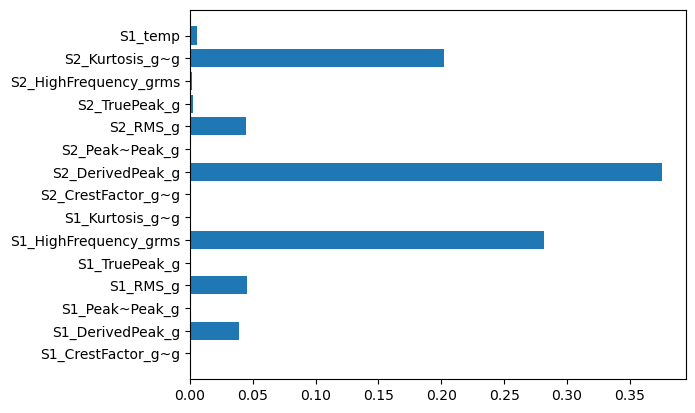

In [45]:
plt.barh(df.columns[:-1], rf.feature_importances_)

In [46]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_vals=scaler.fit_transform(X_vals)

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_test=scaler.fit_transform(X_test)


# MLP

In [47]:

from tensorflow.keras.layers import Dropout,Conv1D,MaxPooling1D,Flatten, Activation, Dense
from tensorflow.keras.regularizers import L1L2
from tensorflow.keras.optimizers import RMSprop
import tensorflow as tf
from datetime import datetime
from tensorflow.keras.layers import Dropout,Conv1D,MaxPooling1D,Flatten, Activation
from tensorflow.keras.regularizers import L1L2
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.models import Sequential
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from autosklearn.regression import AutoSklearnRegressor
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf
from tensorflow.keras.regularizers import L2,L1,L1L2

2023-05-31 14:18:33.434453: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-31 14:18:34.143872: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [48]:
path

'/home/jose/FL_AM_Defect-Detection'

In [49]:

# !rm -rf logs/fit/*
# !rm -rf /home/jose/FL_AM_Defect-Detection/checkpoint/RUL16/*


In [50]:
log_dir = "logs/fit/" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
def scheduler(epoch, lr):
      if epoch < 40:
        lr=0.0001
        return lr
      else:
        lr=0.0001
        return lr #* tf.math.exp(-0.1)
lr = tf.keras.callbacks.LearningRateScheduler(scheduler)

es=EarlyStopping(
    monitor="val_loss",

    patience=3,
    verbose=1,
    mode="auto",
    min_delta=0.001
)

filepath=path+'/checkpoint/RUL16/'+"weights-improvement-{epoch:02d}-{val_mae:.2f}.h5"

# fname = os.path.sep.join([filepath,args["weights"],"weights-{epoch:03d}-{val_loss:.4f}.h5"])

model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath,
    monitor='val_mae',

    mode='min',
    save_best_only=True, verbose=1)


# # checkpoint_filepath = "./tmp/checkpoint"

#scaler = MinMaxScaler()



In [51]:
%load_ext tensorboard
%reload_ext tensorboard

In [52]:

#TRAINING
tf.keras.backend.clear_session()



# self.model
model = Sequential()

# hidden layers
model.add(Dense(40, activation="relu", input_dim=X_train.shape[1],kernel_regularizer=L1L2(l2=0.01,l1=0.01))) #Better
#GOOD 60

model.add(Dropout(0.3))


model.add(Dense(20, activation="relu",kernel_regularizer=L2(l2=0.001)))  #Better
#GOOD 40
model.add(Dropout(0.5))

model.add(Dense(20, activation="linear"))

# output layer
model.add(Dense(1, activation="linear"))
# softmax for probability, #values are sigmoid


# Compile the network :
# NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
# NN_model.summary()

# Configure the model and start training
model.compile(loss='huber', optimizer='adam', metrics=['mae'])

2023-05-31 14:18:36.091242: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1635] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 101 MB memory:  -> device: 0, name: Tesla V100-PCIE-32GB, pci bus id: 0000:3b:00.0, compute capability: 7.0


In [53]:
# y_train
#50 and 30 -->
# R^2: 0.23383518186689745
# Mean Absolute Error (MAE): 396547.5620496487
# Mean Squared Error (MSE): 306771152615.1718
# Mean Absolute Percentage Error (MAPE): 3.5912102242185946e+17
# Root Mean Squared Error (RMSE): 553869.2558855129
# Explained Variance Score: 0.30378274542758565
# Max Error: 17869119.0
# Mean Squared Log Error: 2.760667782700153
# Median Absolute Error: 279682.8125

In [54]:
#FAST AI SEE IF TRIANING IMPROVES !
# 1420492

history=model.fit(X_train, y_train,epochs=200,batch_size=32,validation_data=(X_vals,y_vals) ,verbose=1,callbacks=[tensorboard_callback,lr,model_checkpoint_callback],)


Epoch 1/200


2023-05-31 14:18:43.369920: I tensorflow/compiler/xla/service/service.cc:169] XLA service 0x7f5cb8d7e620 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-05-31 14:18:43.369968: I tensorflow/compiler/xla/service/service.cc:177]   StreamExecutor device (0): Tesla V100-PCIE-32GB, Compute Capability 7.0
2023-05-31 14:18:43.375956: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-05-31 14:18:43.559817: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:424] Loaded cuDNN version 8600
2023-05-31 14:18:43.918391: I ./tensorflow/compiler/jit/device_compiler.h:180] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


13410/13429 [============================>.] - ETA: 0s - loss: 0.1953 - mae: 0.1993
Epoch 1: val_mae improved from inf to 0.32456, saving model to /home/jose/FL_AM_Defect-Detection/checkpoint/RUL16/weights-improvement-01-0.32.h5
13429/13429 [==============================] - 39s 3ms/step - loss: 0.1950 - mae: 0.1993 - val_loss: 0.0709 - val_mae: 0.3246 - lr: 1.0000e-04
Epoch 2/200
13418/13429 [============================>.] - ETA: 0s - loss: 0.0269 - mae: 0.1551
Epoch 2: val_mae did not improve from 0.32456
13429/13429 [==============================] - 36s 3ms/step - loss: 0.0269 - mae: 0.1551 - val_loss: 0.1099 - val_mae: 0.3763 - lr: 1.0000e-04
Epoch 3/200
13417/13429 [============================>.] - ETA: 0s - loss: 0.0237 - mae: 0.1436
Epoch 3: val_mae did not improve from 0.32456
13429/13429 [==============================] - 35s 3ms/step - loss: 0.0237 - mae: 0.1436 - val_loss: 0.0885 - val_mae: 0.3385 - lr: 1.0000e-04
Epoch 4/200
13429/13429 [==============================] -

Epoch 29/200
13411/13429 [============================>.] - ETA: 0s - loss: 0.0209 - mae: 0.1393
Epoch 29: val_mae did not improve from 0.24114
13429/13429 [==============================] - 35s 3ms/step - loss: 0.0209 - mae: 0.1393 - val_loss: 0.0771 - val_mae: 0.3506 - lr: 1.0000e-04
Epoch 30/200
13419/13429 [============================>.] - ETA: 0s - loss: 0.0212 - mae: 0.1402
Epoch 30: val_mae did not improve from 0.24114
13429/13429 [==============================] - 35s 3ms/step - loss: 0.0212 - mae: 0.1402 - val_loss: 0.1015 - val_mae: 0.3857 - lr: 1.0000e-04
Epoch 31/200
13419/13429 [============================>.] - ETA: 0s - loss: 0.0211 - mae: 0.1404
Epoch 31: val_mae did not improve from 0.24114
13429/13429 [==============================] - 35s 3ms/step - loss: 0.0211 - mae: 0.1404 - val_loss: 0.1007 - val_mae: 0.3919 - lr: 1.0000e-04
Epoch 32/200
13424/13429 [============================>.] - ETA: 0s - loss: 0.0207 - mae: 0.1392
Epoch 32: val_mae did not improve from 0.2

KeyboardInterrupt: 

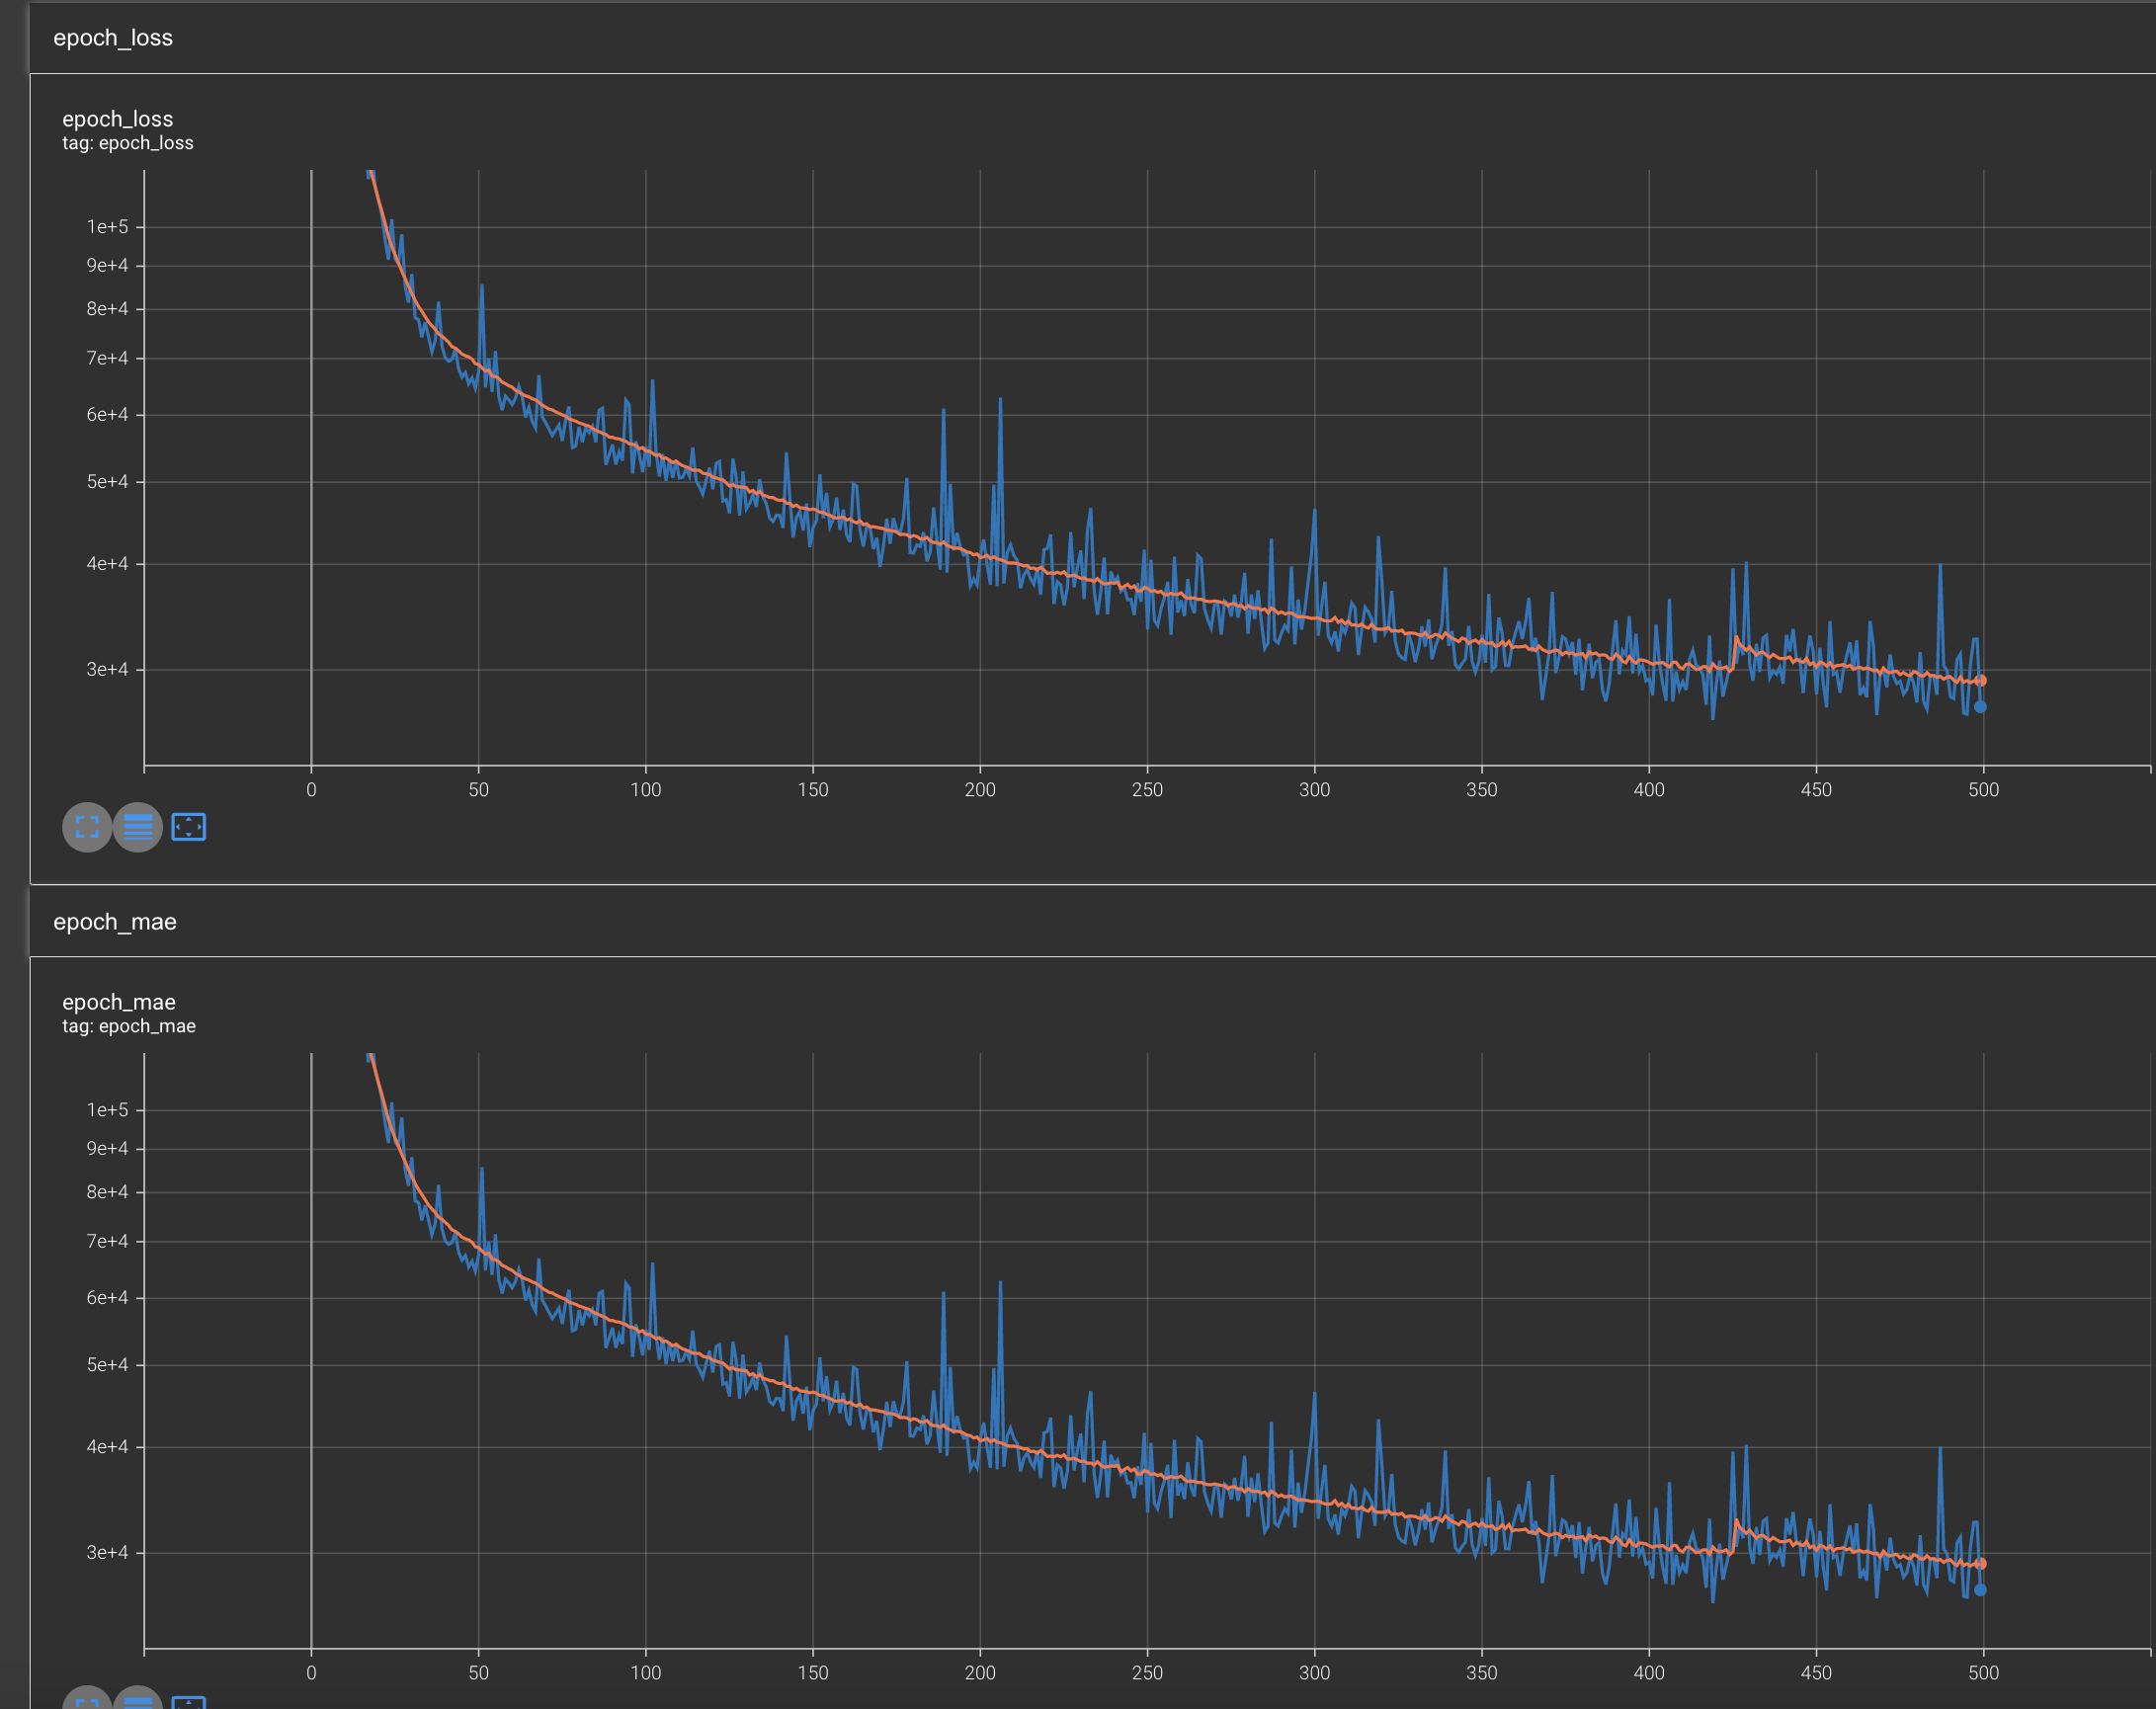

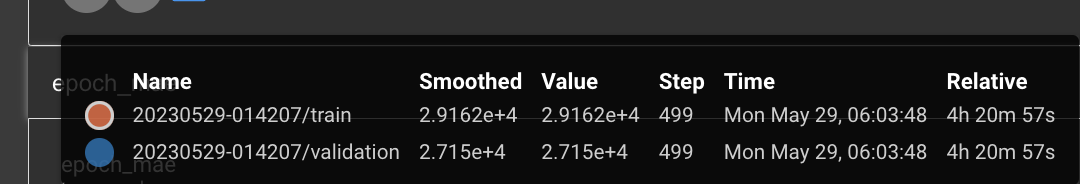

### Saving model

In [64]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 40)                640       
                                                                 
 dropout (Dropout)           (None, 40)                0         
                                                                 
 dense_1 (Dense)             (None, 20)                820       
                                                                 
 dense_2 (Dense)             (None, 1)                 21        
                                                                 
Total params: 1,481
Trainable params: 1,481
Non-trainable params: 0
_________________________________________________________________


In [62]:
# model.save(path+'MLP_REG_RUL_16',save_format='h5')

In [55]:
# loading the saved modelweights-improvement-87-0.16.h
loaded_model = tf.keras.models.load_model('/home/jose/FL_AM_Defect-Detection/checkpoint/RUL16/weights-improvement-11-0.24.h5')


In [56]:
from sklearn.preprocessing import StandardScaler



y_pred = loaded_model.predict(X_test) ## using the untinted dataset!
    
print('R^2:', metrics.r2_score(y_test, y_pred))
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, y_pred))
print('Mean Absolute Percentage Error (MAPE):', metrics.mean_absolute_percentage_error(y_test, y_pred))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) # np.sqrt

print('Explained Variance Score:', metrics.explained_variance_score(y_test, y_pred))
print('Max Error:', metrics.max_error(y_test, y_pred))
print('Mean Squared Log Error:', metrics.mean_squared_log_error(y_test, y_pred))
print('Median Absolute Error:', metrics.median_absolute_error(y_test, y_pred))

## with n_estimators = 150

# R^2: 0.9991654290573937
# Mean Absolute Error (MAE): 1158.6216816072117
# Mean Squared Error (MSE): 333818221.94037396
# Root Mean Squared Error (RMSE): 18270.692979205083
# Explained Variance Score: 0.9991654316522736
# Max Error: 1998236.0866666667
# Mean Squared Log Error: 0.012717975468372306
# Median Absolute Error: 147.4266666667536

## n_estimators = 10
# R^2: 0.9990822069686238
# Mean Absolute Error (MAE): 1213.5715068447246
# Mean Squared Error (MSE): 367106044.79767376
# Mean Absolute Percentage Error (MAPE): 1.0690696275079867e+17
# Root Mean Squared Error (RMSE): 19160.011607451437
# Explained Variance Score: 0.9990822141398445
# Max Error: 1998818.5
# Mean Squared Log Error: 0.012296657672986336
# Median Absolute Error: 137.60000000009313

4477/4477 [==============================] - 3s 760us/step
R^2: -0.19631438476310814
Mean Absolute Error (MAE): 0.18804724906919149
Mean Squared Error (MSE): 0.09146340728725981
Mean Absolute Percentage Error (MAPE): 3564766622.592993
Root Mean Squared Error (RMSE): 0.3024291773081093
Explained Variance Score: -0.009757725780186632
Max Error: 19.044529792297453


ValueError: Mean Squared Logarithmic Error cannot be used when targets contain negative values.

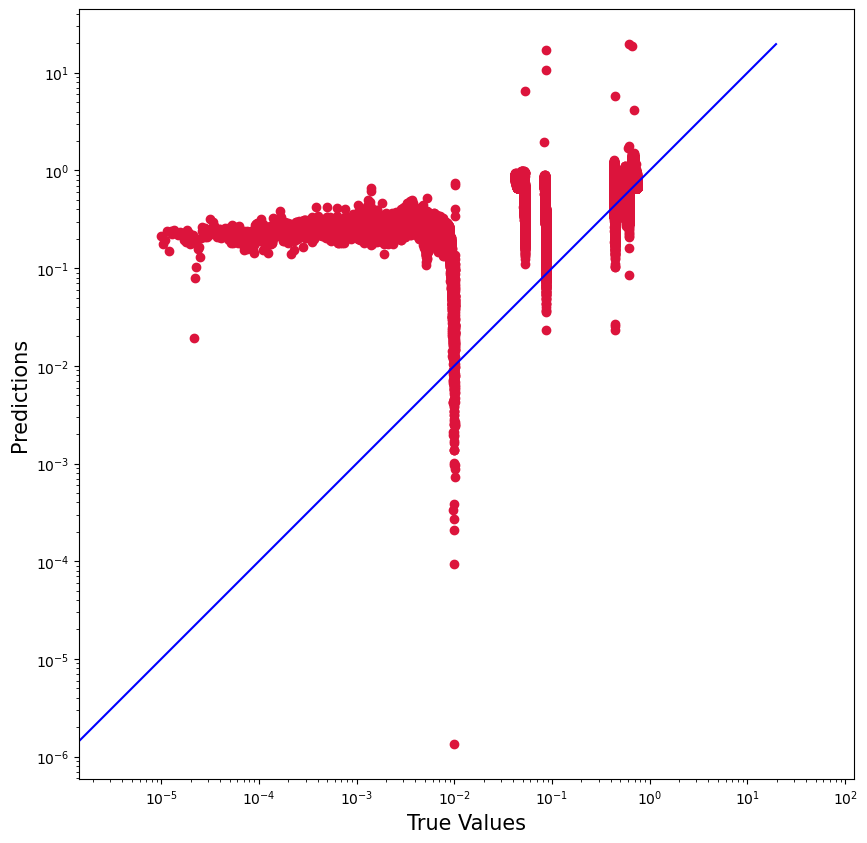

In [57]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, y_pred, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(y_pred), max(y_test))
p2 = min(min(y_pred), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

In [62]:
from sklearn.neural_network import MLPRegressor

In [67]:
regr = MLPRegressor(random_state=1,
                    activation='relu',
                    hidden_layer_sizes=(500, 200),
                    alpha=0.001,
                    validation_fraction=0.2,
                    early_stopping=True,
                    shuffle=False,

                    max_iter=100,
                    verbose=1).fit(X_train, y_train)
cross_val_score(regr, boston.data, boston.target, cv=5)

Iteration 1, loss = 484065642110.83990479
Validation score: 0.004739
Iteration 2, loss = 174355095631.67358398
Validation score: 0.168222
Iteration 3, loss = 149155617026.36279297
Validation score: 0.245670
Iteration 4, loss = 133630678654.15742493
Validation score: 0.293434
Iteration 5, loss = 122831563709.81637573
Validation score: 0.335569
Iteration 6, loss = 113539177804.76219177
Validation score: 0.375605
Iteration 7, loss = 106295956705.11863708
Validation score: 0.407871
Iteration 8, loss = 100428638812.65998840
Validation score: 0.438236
Iteration 9, loss = 95255320841.98892212
Validation score: 0.465497
Iteration 10, loss = 91111506822.19839478
Validation score: 0.488427
Iteration 11, loss = 87965084593.21804810
Validation score: 0.508794
Iteration 12, loss = 85664315219.85084534
Validation score: 0.525191
Iteration 13, loss = 83851972720.09226990
Validation score: 0.539261
Iteration 14, loss = 82340170950.33241272
Validation score: 0.551633
Iteration 15, loss = 81000154120.10

NameError: name 'cross_val_score' is not defined

In [69]:


y_pred = regr.predict(X_test)#loaded_model.predict(X_test) ## using the untinted dataset!
    
print('R^2:', metrics.r2_score(y_test, y_pred))
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, y_pred))
print('Mean Absolute Percentage Error (MAPE):', metrics.mean_absolute_percentage_error(y_test, y_pred))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) # np.sqrt

print('Explained Variance Score:', metrics.explained_variance_score(y_test, y_pred))
print('Max Error:', metrics.max_error(y_test, y_pred))
print('Mean Squared Log Error:', metrics.mean_squared_log_error(y_test, y_pred))
print('Median Absolute Error:', metrics.median_absolute_error(y_test, y_pred))

## with n_estimators = 150

# R^2: 0.9991654290573937
# Mean Absolute Error (MAE): 1158.6216816072117

# Mean Squared Error (MSE): 333818221.94037396
#                             51005685695
#                             113539177804
#                             41008695224
# Root Mean Squared Error (RMSE): 18270.692979205083
# Explained Variance Score: 0.9991654316522736
# Max Error: 1998236.0866666667
# Mean Squared Log Error: 0.012717975468372306
# Median Absolute Error: 147.4266666667536

## n_estimators = 10
# R^2: 0.9990822069686238
# Mean Absolute Error (MAE): 1213.5715068447246
# Mean Squared Error (MSE): 367106044.79767376
# Mean Absolute Percentage Error (MAPE): 1.0690696275079867e+17
# Root Mean Squared Error (RMSE): 19160.011607451437
# Explained Variance Score: 0.9990822141398445
# Max Error: 1998818.5
# Mean Squared Log Error: 0.012296657672986336
# Median Absolute Error: 137.60000000009313

R^2: -10.894752597582858
Mean Absolute Error (MAE): 1334991.5743351318
Mean Squared Error (MSE): 4762639680224.632
Mean Absolute Percentage Error (MAPE): 4.385553354269073e+17
Root Mean Squared Error (RMSE): 2182347.2868048823
Explained Variance Score: -7.756452957948893
Max Error: 7292011.501692939


ValueError: Mean Squared Logarithmic Error cannot be used when targets contain negative values.

In [ ]:
X_test[0]

In [103]:
X_test[1]

array([-1.09820082,  1.62435592,  1.55120122,  1.6241777 ,  1.50739436,
        1.64104718, -0.57738256,  0.61560621, -1.27072215, -1.38202127,
       -1.27130631, -1.40562225, -1.39447643,  0.77222877, -1.11509319])

In [65]:
y_pred[0]

array([10309846.], dtype=float32)

In [73]:
y_test.values[2]

1141354.0

In [66]:
y_pred[1]

array([22637778.], dtype=float32)

### Show feature importance

['Probe_3_RadialHorizontal_Kurtosis_g~g', 'Probe_6_BearingRadial_DerivedPeak_g', 'Probe_2_RadialVertical_Kurtosis_g~g', 'Probe_1_AxialDirection_DerivedPeak_g', 'Probe_6_BearingRadial_HighFrequency_grms', 'Probe_5_RadialHorizontal_TruePeak_g', 'Probe_3_RadialHorizontal_Peak~Peak_g', 'Probe_4_RadialVertical_HighFrequency_grms']


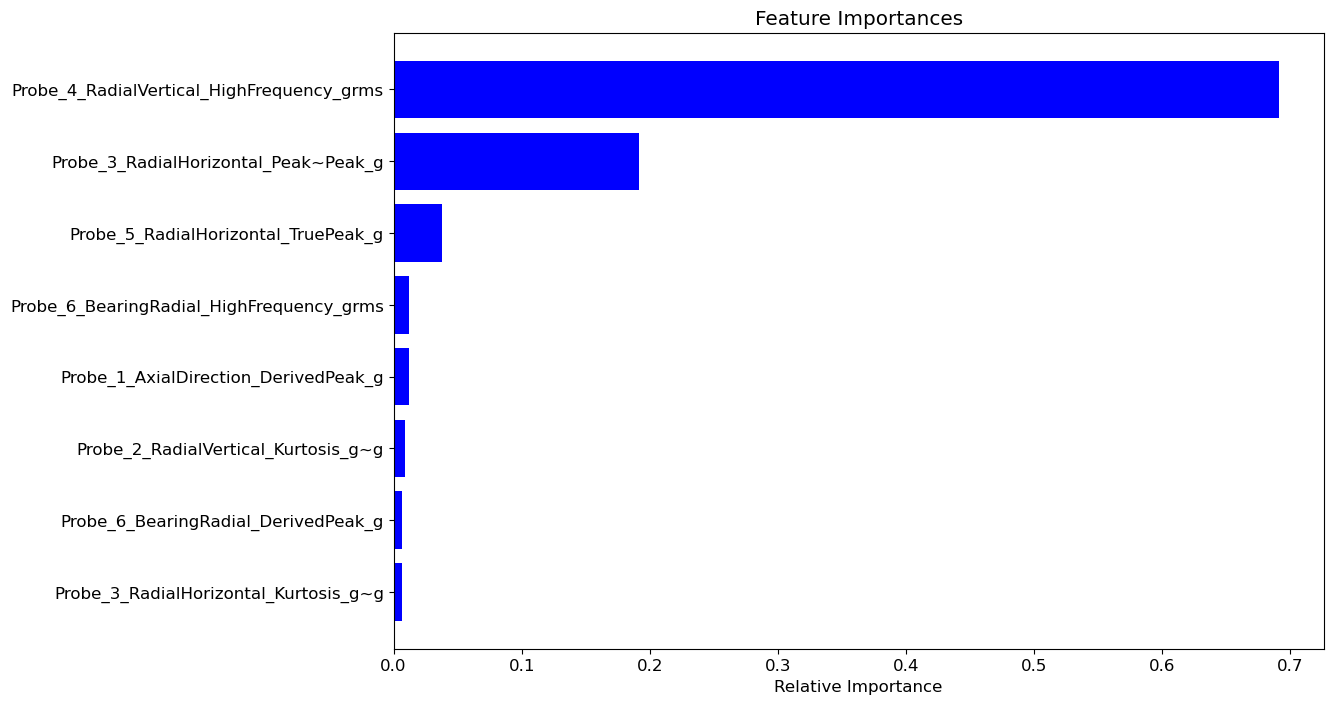

In [33]:
# RF: Get feature list
## Learn more: https://towardsdatascience.com/explaining-feature-importance-by-example-of-a-random-forest-d9166011959e

features = list(X_test.columns)  

rf_imp_features = []

## Plot the feature importance
def plot_feature_importance ():
    importances = rf.feature_importances_
    
    indices = np.argsort(importances)[len(importances)-8:] ## top 25    

    plt.figure(figsize = (12,8))
    plt.rcParams['font.size'] = 12
    
    plt.title('Feature Importances')
    plt.barh(range(len(indices)), importances[indices], color='b', align='center')

    features_y = []
    for x in indices:
        features_y.append(features[x])
    print(features_y)
    plt.yticks(range(len(indices)), features_y) 

    plt.xlabel('Relative Importance')
    plt.savefig(data_path + 'fi_offset_RUL.png') # save

    plt.show()
    return features_y

rf_imp_features = plot_feature_importance()


In [34]:
rf_imp_features

['Probe_3_RadialHorizontal_Kurtosis_g~g',
 'Probe_6_BearingRadial_DerivedPeak_g',
 'Probe_2_RadialVertical_Kurtosis_g~g',
 'Probe_1_AxialDirection_DerivedPeak_g',
 'Probe_6_BearingRadial_HighFrequency_grms',
 'Probe_5_RadialHorizontal_TruePeak_g',
 'Probe_3_RadialHorizontal_Peak~Peak_g',
 'Probe_4_RadialVertical_HighFrequency_grms']

### Prediction

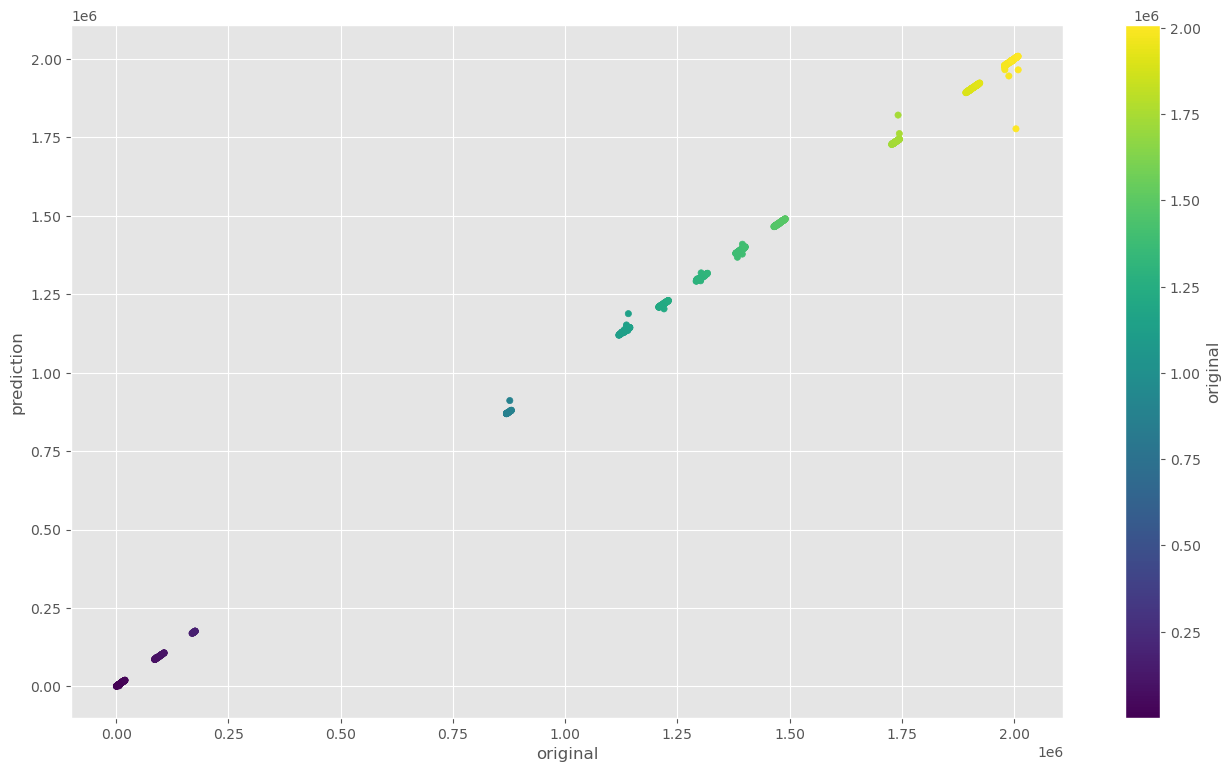

In [35]:
# get a random sample to verify the results!
## 
import matplotlib
import matplotlib.pyplot as plt
RNDSEED = np.random.seed(39)

dfs = df.sample(1000, random_state = RNDSEED) # data points
# print(dfs.rul)
X_dfs = dfs.drop('rul',axis = 1) # drop response

ys_pred = rf.predict(X_dfs)
# print(ys_pred)

rul = dfs[['rul']]
rul = rul.rename(columns={'rul': 'original'})
rul['prediction'] = ys_pred
# rul.head(5)

matplotlib.style.use('ggplot') ## styling

rul.plot.scatter(x='original', y='prediction', figsize=(16, 9), c='original', colormap='viridis') ## scatter

plt.savefig(path + 'offset_rul_prediction.png') # save


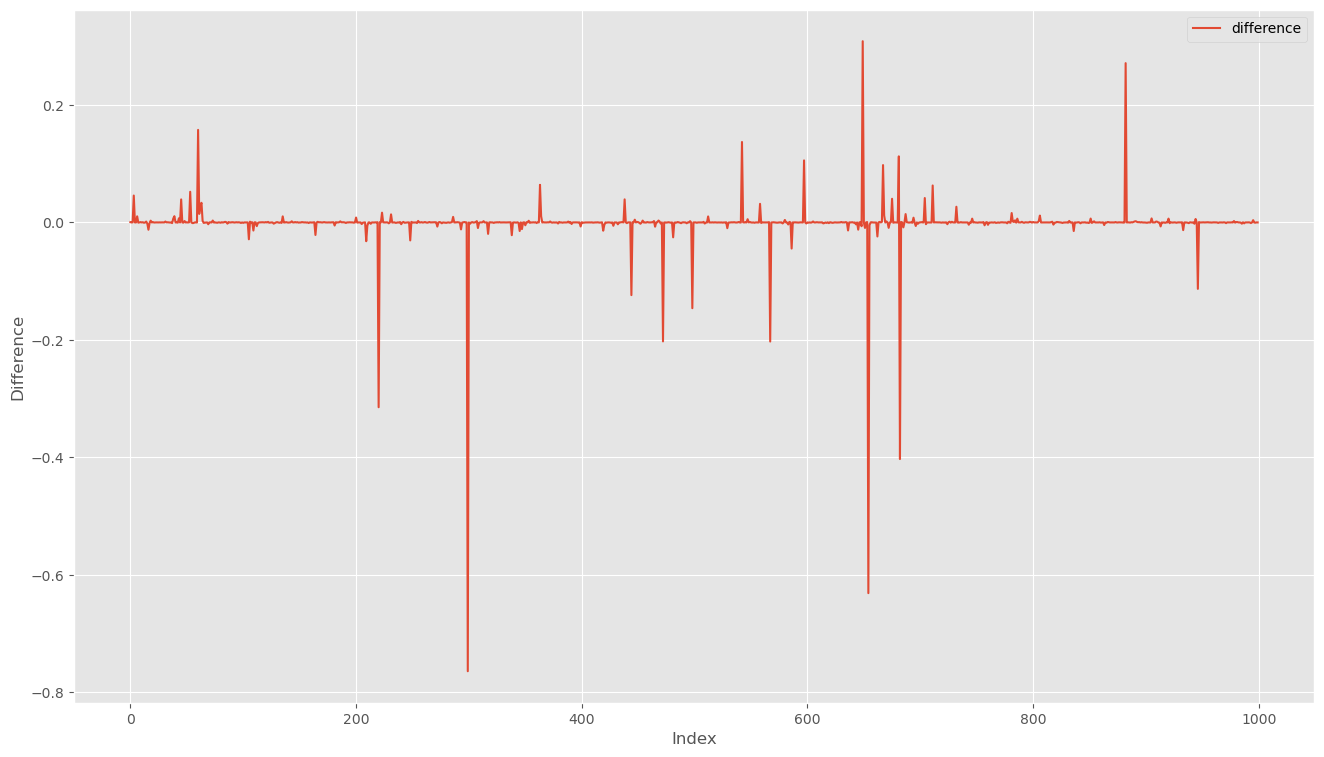

8


In [36]:
## Plot the % of deviation 

rul['difference'] = (rul['prediction'] - rul['original']) /  rul['original']

rul.index = range(len(rul.index)) ## reset index

ax = rul.plot( y=["difference"], figsize=(16, 9))

ax.set_xlabel("Index")
ax.set_ylabel("Difference")

plt.show()

# out of couriosity 
print(len(rul[(rul['difference'] > 0.2) | (rul['difference'] < -0.2)])) # how many more than 20%? # 8 only!

In [37]:
## styles
plt.style.available


['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

In [38]:
import pandas as pd
import os


STEPS_PER_BATCH=32
PRECISION = 4 # 3 of digits to keep after the decimal point
SEQUENCE_LENGHT=4
RUNNING_ON_COLAB = False # we assume running on CoLab! Change to False if running locally.

In [35]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Input
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from tensorflow.keras.layers import Dropout,Conv1D,MaxPooling1D,Flatten, Activation, Dense, Input
from tensorflow.keras.regularizers import L1L2
from tensorflow.keras.optimizers import RMSprop
from keras.models import Sequential
import tensorflow as tf


In [53]:
# ## true orignal ones
# # data split


# out_seq = np.array(y_test)#out_seq.reshape((len(out_seq), 1))
# # horizontally stack columns
# scaler = MinMaxScaler()
# X_vals=scaler.fit_transform(X_test)
# dataset = np.array(X_test)#hstack((in_seq1, in_seq2))

# pd.DataFrame(dataset)




# # shift the target sample by one step
# out_seq = np.insert(out_seq, 0, 0)
# #pre

# out_seq = np.delete(out_seq, -1)
# # define generator
# n_input = SEQUENCE_LENGHT #leght of the sequence timesteps
# testing_generator = TimeseriesGenerator(dataset, out_seq, length=n_input, batch_size=STEPS_PER_BATCH)
# # print each sample
# # for i in range(len(testing_generator)):
# #     x, y = generator[i]
# #     print('%s => %s' % (x, y))



In [54]:

# out_seq = np.array(y_train)
# # horizontally stack columns

# dataset = np.array(X_train)

# X_train = scaler.fit_transform(X_train)

# # shift the target sample by one step
# out_seq = np.insert(out_seq, 0, 0)
# #pre
# out_seq = np.delete(out_seq, -1)
# # define generator
# n_input = SEQUENCE_LENGHT #leght of the sequence timesteps

# training_generator = TimeseriesGenerator(dataset, out_seq, length=n_input, batch_size=STEPS_PER_BATCH)
X_train.shape[0]

179041

2023-05-08 12:09:54.528709: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-08 12:09:55.132082: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [43]:
# # define generator
# n_features = 46

# # model = Sequential()
# # # model.add(Conv1D(filters=120, kernel_size=2, activation='relu', input_shape=(n_input,n_features)))
# # # model.add(Conv1D(filters=80, kernel_size=2, activation='relu'))
# # # model.add(Dropout(0.5))
# # # model.add(MaxPooling1D(pool_size=2))
# # # model.add(Flatten())
# # #model.add(Dense(80), activation='relu'))
# # model.add(Dense(1,))

# # model.compile(loss=tf.keras.losses.Huber(), optimizer = tf.keras.optimizers.SGD(), metrics =['mse','mae'])

# # history = model.fit(training_generator,
# #                                         steps_per_epoch=STEPS_PER_BATCH,
# #                                         epochs=3000,
# #                                         verbose=1,)
# #                                         # callbacks=[tensorboard_callback],)#,es
# #                                         #validation_data=validation_generator) # class_weight=class_weights)

# model1 = Sequential()

# model1.add(Dense(100, input_shape=(46,), activation='relu'))
# model1.add(Dense(500, activation='relu'))
# model1.add(Dense(1, activation='linear'))

# # Configure the model and start training
# model1.compile(loss='mae', optimizer='adam', metrics=['mae','mse'])


In [1]:
# history=model1.fit(X_train, y_train, epochs=250, batch_size=32, verbose=1, validation_split=0.2)

# New code

In [73]:
os.chdir('..')

In [74]:
X_train

,Probe_1_AxialDirection_CrestFactor_g~g,Probe_1_AxialDirection_DerivedPeak_g,Probe_1_AxialDirection_Peak~Peak_g,Probe_1_AxialDirection_RMS_g,Probe_1_AxialDirection_TruePeak_g,Probe_1_AxialDirection_HighFrequency_grms,Probe_1_AxialDirection_Kurtosis_g~g,Probe_2_RadialVertical_CrestFactor_g~g,Probe_2_RadialVertical_DerivedPeak_g,Probe_2_RadialVertical_Peak~Peak_g,...,Probe_6_BearingRadial_DerivedPeak_g,Probe_6_BearingRadial_Peak~Peak_g,Probe_6_BearingRadial_RMS_g,Probe_6_BearingRadial_TruePeak_g,Probe_6_BearingRadial_HighFrequency_grms,Probe_6_BearingRadial_Kurtosis_g~g,Thermocouple 1_Value,Thermocouple 2_Value,Thermocouple 3_Value,Thermocouple 4_Value
198870,3.1645,0.1615,0.7107,0.1142,0.3615,0.0502,2.5928,3.1628,0.4020,1.7686,...,0.0185,0.0965,0.0131,0.0556,0.0046,2.9935,73.6422,73.2496,73.4353,73.7359
131703,2.8734,0.2231,0.8984,0.1577,0.4533,0.0557,2.3171,3.3820,0.4083,1.8823,...,0.0217,0.1335,0.0153,0.0807,0.0048,3.1651,73.9666,73.5732,73.6575,73.7733
118752,2.8543,0.2400,0.9247,0.1697,0.4844,0.0561,2.2305,3.0494,0.4185,1.7860,...,0.0219,0.1033,0.0155,0.0527,0.0052,2.7738,72.9677,72.6550,72.8152,73.1194
23063,3.0715,0.1358,0.5750,0.0960,0.2949,0.0255,2.5051,3.0292,0.4237,1.7696,...,0.0253,0.1461,0.0179,0.0938,0.0070,3.2156,72.5041,72.4811,72.4794,72.4657
39185,2.9225,0.1379,0.5661,0.0975,0.2850,0.0468,2.5263,3.2384,0.3893,1.7745,...,0.0217,0.1099,0.0153,0.0558,0.0056,3.0094,73.2162,72.9887,73.1915,73.7537
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121748,2.7815,0.2483,0.9412,0.1756,0.4884,0.0556,2.1550,3.0191,0.4123,1.7532,...,0.0213,0.1192,0.0151,0.0607,0.0043,2.8287,72.9866,72.7071,72.8204,73.1791
164928,2.8846,0.1985,0.8018,0.1404,0.4050,0.0416,2.3776,2.9264,0.4389,1.7862,...,0.0226,0.1519,0.0160,0.0982,0.0074,3.2447,73.5716,73.7547,73.6346,73.6159
203817,2.9056,0.1493,0.5906,0.1056,0.3068,0.0497,2.4738,3.1811,0.4080,1.8312,...,0.0187,0.0940,0.0133,0.0536,0.0046,2.9598,73.4247,73.0950,73.2151,73.6930
221289,2.9897,0.1948,0.8012,0.1377,0.4118,0.0501,2.3208,3.1607,0.4008,1.7621,...,0.0193,0.1044,0.0136,0.0570,0.0044,3.1631,72.4883,72.1482,72.2905,72.7286


# UP To Here

In [64]:
#https://www.kaggle.com/code/kmat2019/u-net-1d-cnn-with-keras
!pwd

/home/jose/FL_AM_Defect-Detection


In [78]:
os.chdir('notebooks')

In [86]:
# cnn model
from numpy import mean
from numpy import std
from numpy import dstack
from pandas import read_csv
from matplotlib import pyplot
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.utils import to_categorical

# load a single file as a numpy array
def load_file(filepath):
	dataframe = read_csv(filepath, header=None, delim_whitespace=True)
	print(dataframe.head())# HERE I WAS TABIULAR DATA
	return dataframe.values

# load a list of files and return as a 3d numpy array
def load_group(filenames, prefix=''):
	loaded = list()
	for name in filenames:
		data = load_file(prefix + name)
		loaded.append(data)
	# stack group so that features are the 3rd dimension
	loaded = dstack(loaded)
	return loaded

# load a dataset group, such as train or test
def load_dataset_group(group, prefix=''):
	filepath = prefix + group + '/Inertial Signals/'
	# load all 9 files as a single array
	filenames = list()
	# total acceleration
	filenames += ['total_acc_x_'+group+'.txt', 'total_acc_y_'+group+'.txt', 'total_acc_z_'+group+'.txt']
	# body acceleration
	filenames += ['body_acc_x_'+group+'.txt', 'body_acc_y_'+group+'.txt', 'body_acc_z_'+group+'.txt']
	# body gyroscope
	filenames += ['body_gyro_x_'+group+'.txt', 'body_gyro_y_'+group+'.txt', 'body_gyro_z_'+group+'.txt']
	# load input data
	X = load_group(filenames, filepath)
	# load class output
	y = load_file(prefix + group + '/y_'+group+'.txt')
	print(X.shape)
	print("SHAPES")
	return X, y

# load the dataset, returns train and test X and y elements
def load_dataset(prefix=''):
	# load all train
	trainX, trainy = load_dataset_group('train', prefix + 'HARDataset/')
	print(trainX.shape, trainy.shape)
	print("CHECKKK")
	print(trainX.shape)
	print(trainy.shape)
	# load all test
	testX, testy = load_dataset_group('test', prefix + 'HARDataset/')
	print(testX.shape, testy.shape)
	# zero-offset class values
	trainy = trainy - 1
	testy = testy - 1
	# one hot encode y
	trainy = to_categorical(trainy)
	testy = to_categorical(testy)
	print("dsafdssdf")
	print(trainX.shape, trainy.shape, testX.shape, testy.shape)
	return trainX, trainy, testX, testy

# fit and evaluate a model
def evaluate_model(trainX, trainy, testX, testy):
	verbose, epochs, batch_size = 1, 10, 32
	n_timesteps, n_features, n_outputs = trainX.shape[1], trainX.shape[2], trainy.shape[1]
	model = Sequential()
	model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(n_timesteps,n_features)))
	model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
	model.add(Dropout(0.5))
	model.add(MaxPooling1D(pool_size=2))
	model.add(Flatten())
	model.add(Dense(100, activation='relu'))
	model.add(Dense(n_outputs, activation='softmax'))
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	# fit network
	model.fit(trainX, trainy, epochs=epochs, batch_size=batch_size, verbose=verbose)
	# evaluate model
	_, accuracy = model.evaluate(testX, testy, batch_size=batch_size, verbose=1)
	return accuracy

# summarize scores
def summarize_results(scores):
	print(scores)
	m, s = mean(scores), std(scores)
	print('Accuracy: %.3f%% (+/-%.3f)' % (m, s))

# run an experiment
def run_experiment(repeats=10):
	# load data
	trainX, trainy, testX, testy = load_dataset()
	print(trainX)
	print(trainy)
	# repeat experiment
	scores = list()
	for r in range(repeats):
		score = evaluate_model(trainX, trainy, testX, testy)
		score = score * 100.0
		print('>#%d: %.3f' % (r+1, score))
		scores.append(score)
	# summarize results
	summarize_results(scores)

# run the experiment
run_experiment()
#CHECK SHAPE OF VECRTOR!
#https://machinelearningmastery.com/cnn-models-for-human-activity-recognition-time-series-classification/

        0         1         2         3         4         5         6    \
0  1.012817  1.022833  1.022028  1.017877  1.023680  1.016974  1.017746   
1  1.018851  1.022380  1.020781  1.020218  1.021344  1.020522  1.019790   
2  1.023127  1.021882  1.019178  1.015861  1.012893  1.016451  1.020331   
3  1.017682  1.018149  1.019854  1.019880  1.019121  1.020479  1.020595   
4  1.019952  1.019616  1.020933  1.023061  1.022242  1.020867  1.021939   

        7         8         9    ...       118       119       120       121  \
0  1.019263  1.016417  1.020745  ...  1.020981  1.018065  1.019638  1.020017   
1  1.019216  1.018307  1.017996  ...  1.019291  1.019258  1.020736  1.020950   
2  1.020266  1.021759  1.018649  ...  1.020304  1.021516  1.019417  1.019312   
3  1.016340  1.010611  1.009013  ...  1.021295  1.022934  1.022183  1.021637   
4  1.022300  1.022302  1.022254  ...  1.022687  1.023670  1.019899  1.017381   

        122       123       124       125       126       127  
0  1

        0         1         2         3         4         5         6    \
0  0.022859  0.010316  0.013250  0.017751  0.002553  0.007725  0.004325   
1  0.012268  0.016150  0.015895  0.012671  0.008774  0.005685  0.006093   
2  0.002159 -0.000272  0.002631  0.003376  0.000057  0.001268 -0.001209   
3 -0.000873 -0.005482 -0.004678 -0.000221  0.001588  0.009021  0.020953   
4 -0.001574  0.000201 -0.000970 -0.000673 -0.000693 -0.002041 -0.000265   

        7         8         9    ...       118       119       120       121  \
0  0.010617  0.017189  0.010511  ... -0.006042 -0.006891 -0.004903  0.001354   
1  0.008383  0.011140  0.012406  ...  0.016544  0.018556  0.018173  0.018046   
2 -0.002290  0.000451 -0.000389  ... -0.003351 -0.002691 -0.000283  0.000404   
3  0.028212  0.028609  0.024456  ... -0.009409 -0.011208 -0.013223 -0.013121   
4 -0.000217 -0.001554 -0.000895  ...  0.012295  0.009031  0.009103  0.005473   

        122       123       124       125       126       127  
0  0

        0         1         2         3         4         5         6    \
0  0.531349  0.721069  0.520328  0.372625  0.414541  0.333328  0.278828   
1 -0.061374 -0.095364 -0.146450 -0.126174 -0.092850 -0.085435 -0.051600   
2 -0.060250 -0.051756 -0.050428 -0.047289 -0.045649 -0.046523 -0.046078   
3  0.003590  0.024609  0.022714 -0.005963 -0.039240 -0.064194 -0.058898   
4 -0.032427 -0.037960 -0.042714 -0.041178 -0.037085 -0.034132 -0.027526   

        7         8         9    ...       118       119       120       121  \
0  0.270581  0.071018  0.004640  ... -0.106632 -0.108275 -0.108308 -0.108405   
1 -0.007535  0.053288  0.162047  ... -0.037494 -0.041349 -0.039796 -0.033819   
2 -0.043316 -0.042571 -0.050085  ... -0.024245 -0.034927 -0.040215 -0.040923   
3 -0.034983 -0.017993 -0.002546  ... -0.011480 -0.008477 -0.003954  0.002396   
4 -0.020723 -0.020127 -0.021431  ... -0.036274 -0.035293 -0.018226  0.000560   

        122       123       124       125       126       127  
0 -0

KeyboardInterrupt: 